In [1]:
using Revise

In [2]:
using Random
using Distributions
using Plots
using JuMP
using CPLEX
using LinearAlgebra
using StatsPlots

In [3]:
includet("functions.jl")

In [ ]:
# includet("toy_pb_2d.jl")

Valeurs pour les tests en 2d

In [ ]:
nb_palier_th = [4 5]

#en unité d'énergie
d = [80 100] #Demande sur un pas de temps
list_d = [d, [85 105]]
gh_sup = [100 120]#Génération hydrolique max sur un pas de temps

Emax = [300 500]
K = [50 50]

c_spill = [1 0.5]
# B_inf = 0 # - 1e8 #Borne inf, en principe il ne faut pas qu'elle soit atteinte
alpha = 0.9

x_0 = [100 150]
val_arrivee = [50 100]
coupes = []
saa = [[50, 90], [70, 130]]

list_saa = [saa, [[40, 100], [80, 120]]]
# nb_mc = length(saa[1])
capa_th = Array{Float64, 2}[
    [10 15 10 5],
    [20 15 10 5 5]
]
c_th = Array{Float64, 2}[
    [1 2 5 10],
    [1 2 5 10 15]
]
trans_max = [10 15]
trans_c = 0.2

In [ ]:
m = JuMP.Model(CPLEX.Optimizer)
build_2d!(m, nb_palier_th,d, gh_sup, Emax, K, c_spill, alpha, x_0, val_arrivee, coupes, saa, capa_th, c_th, trans_max, trans_c)
print(m)

In [ ]:
m.ext[:saa]

In [ ]:
Th(m, [0, 0])

In [ ]:
cut!(m, [0, 0])

In [ ]:
print(m)

In [ ]:
# for i in 1:1000
#     unif = Uniform(0.0,300.0)
#     cut_here = rand(unif)
#     cut_argmin_Bh!(m, cut_here, 1e-8)
# end

# val = valeur(m, 300)
# println(val)

# valeur(x) = valeur(m, x) 
# plot_values = 0:1:300
# maxcuts_values = valeur.(plot_values)
# plot(plot_values, maxcuts_values, label="argmin heuristique VI")

In [ ]:
# Random.seed!(2)
for i in 1:100
    unif_1 = Uniform(0.0,300.0)
    unif_2 = Uniform(0.0, 500.0)
    cut_here_1 = rand(unif_1)
    cut_here_2 = rand(unif_2)
    # println([cut_here_1, cut_here_2])
    cut_argmin_Bh!(m, [cut_here_1, cut_here_2], 1e-2)
end

In [ ]:
valeur(m, [20, 20])

In [ ]:
print((m.ext[:Bh]).ext[:prec_argmin])

In [ ]:
println(nb_cuts_Bh(m))

In [ ]:
includet("functions.jl")

In [ ]:
println(multiple_evaluation(m, 100, 50))

In [ ]:
models = build_2d_periodic(2, nb_palier_th, list_d, gh_sup, Emax, K, c_spill, alpha, x_0, val_arrivee, list_saa, capa_th, c_th, trans_max, trans_c)

In [ ]:
models[1].ext[:x]
cut_period!(models, [0, 0], 1, 2)

In [ ]:
includet("functions.jl")

In [ ]:
Random.seed!(2)
for i in 1:100
    for t in 1:2
        unif_1 = Uniform(0.0,300.0)
        unif_2 = Uniform(0.0, 500.0)
        cut_here_1 = rand(unif_1)
        cut_here_2 = rand(unif_2)
        # println([cut_here_1, cut_here_2])
        cut_argmin_Bh_period!(models, [cut_here_1, cut_here_2], 1e-2, t)
    end
end

In [ ]:
nb_cuts_total(models)

In [ ]:
nb_cut_Bh_total(models)

In [ ]:
println(multiple_evaluation_period(models, 100, 100))

In [ ]:
nb_active_cuts_period(models)

In [ ]:
nb_active_cuts(models[2])

In [ ]:
scenarios =[
        [[56896.8, 56451.95, 65408.16, 46580.39, 54645.97, 36916.81, 63301.09, 53645.87, 57959.52, 54200.71, 48448.49, 45010.7, 81105.82, 35019.44, 41229.43, 80514.3, 51163.61, 53329.75, 50702.92, 42240.62, 55109.13, 33675.91, 25129.81, 29190.4, 36301.34, 37791.77, 58268.57, 39743.58, 62565.51, 49713.71, 72890.69, 45726.42, 66364.28, 37928.66, 62789.08, 73042.18, 66665.7, 52993.58, 31559.83, 56002.39, 30617.05, 40899.73, 54433.46, 62568.66, 51341.31, 40927.71, 73413.29, 69900.43, 66850.87, 76182.63, 72077.01, 84213.88, 64555.38, 72950.98, 53957.75, 53046.27, 47082.36, 58093.71, 80492.3, 47948.51, 60261.41, 47993.66, 64712.19, 52583.97, 55161.47, 92429.3, 43304.33, 58739.64, 55468.74, 40817.11, 63727.25, 60146.67, 47266.3, 67074.83, 46916.31, 95400.9, 38313.51, 54999.69, 71369.67, 76664.21, 73633.5, 46999.32], [86488.31, 61922.34, 51128.33, 37113.35, 72711.15, 29950.27, 43981.97, 45561.95, 57663.45, 75154.55, 38353.62, 51036.28, 73890.02, 47726.22, 71175.26, 62788.22, 61001.38, 57412.95, 72857.05, 65235.58, 67209.56, 50100.68, 26092.14, 44292.32, 27535.59, 25749.92, 62387.31, 57549.88, 50654.11, 59386.44, 77049.72, 60836.23, 59055.5, 61202.37, 78078.5, 78991.29, 71465.94, 47197.58, 37602.63, 57691.13, 20504.58, 58197.41, 54655.96, 45842.69, 48096.68, 47690.98, 71610.48, 47429.75, 89520.11, 92447.91, 47928.35, 71909.26, 47626.61, 70620.4, 50034.14, 59045.22, 57525.75, 61449.32, 41790.65, 65572.44, 86433.67, 68600.8, 51672.08, 83801.3, 41190.08, 73474.32, 53990.6, 50665.03, 67756.3, 40550.35, 70939.21, 61771.53, 71467.42, 59049.86, 49152.53, 91724.84, 63801.6, 66431.93, 59988.07, 50373.33, 49701.05, 56717.86], [88646.94, 50742.1, 40424.25, 35392.72, 61323.17, 53709.93, 39542.99, 40185.12, 34083.82, 68610.98, 35718.51, 62628.01, 69692.0, 51495.85, 62809.69, 70220.74, 93477.21, 59883.76, 53172.92, 56491.72, 65725.0, 77701.54, 32542.38, 29444.29, 29070.61, 37872.92, 63481.8, 47988.85, 52728.54, 63441.32, 78376.69, 60248.39, 41110.96, 37183.08, 83982.68, 72883.91, 61051.15, 52788.25, 33315.79, 58386.71, 25463.7, 52687.47, 48144.5, 63161.07, 36378.46, 48314.32, 39789.9, 54422.3, 57184.51, 62386.9, 43430.01, 85259.92, 39652.55, 71335.51, 47263.74, 47293.6, 62981.06, 54515.96, 43462.15, 68127.72, 55948.83, 56153.76, 61042.16, 52448.52, 54230.46, 57821.91, 55790.78, 59436.74, 62295.26, 38312.37, 49257.88, 48780.76, 62710.63, 57188.43, 59325.77, 51971.26, 64294.7, 47939.56, 54351.96, 86775.98, 37212.98, 49482.34], [64581.71, 35954.27, 34627.46, 27179.93, 54644.39, 37115.42, 35188.12, 30857.44, 28957.8, 38145.67, 33851.76, 45004.41, 41888.5, 32537.77, 61618.73, 45492.33, 57661.37, 40768.91, 36675.8, 39891.03, 46600.38, 41833.13, 35331.16, 24828.12, 28963.44, 26392.81, 57277.26, 40083.16, 39037.46, 40510.26, 49649.42, 35895.16, 28420.51, 27653.31, 52072.86, 47120.75, 42126.42, 31221.08, 23267.58, 33811.21, 21492.44, 37357.77, 49257.71, 56164.65, 34749.3, 38150.11, 44706.32, 35701.34, 40448.63, 52746.17, 40067.9, 62428.88, 42785.49, 52326.19, 32913.93, 41161.01, 44123.86, 36565.93, 35065.17, 68823.2, 50669.57, 47121.6, 43602.65, 47373.13, 36659.8, 45289.32, 45618.72, 34198.26, 38268.72, 28944.83, 31516.06, 42862.66, 48390.75, 37943.12, 50501.94, 35807.24, 52671.46, 49262.74, 46138.46, 55543.29, 32317.51, 51632.89], [43078.74, 27000.91, 24456.72, 19080.88, 34731.77, 24512.01, 27671.57, 25654.34, 24788.09, 29380.5, 18923.09, 30031.07, 26936.13, 22540.12, 34858.01, 30581.26, 34635.02, 24931.13, 27008.57, 27616.21, 28566.65, 25574.69, 21342.69, 30732.45, 17083.18, 29745.45, 34161.48, 32373.28, 25060.83, 30213.42, 39757.11, 26435.75, 20601.37, 21707.83, 45436.42, 34622.49, 28792.77, 22897.49, 17471.04, 24573.34, 18395.36, 23937.22, 31238.07, 34468.55, 23514.07, 29321.19, 29379.36, 28537.54, 34587.4, 35207.58, 27619.03, 39712.36, 35169.64, 37162.41, 31130.86, 39983.01, 35946.54, 28366.52, 29951.98, 40186.78, 50571.36, 32563.19, 32207.74, 34805.16, 26620.61, 32791.29, 35023.07, 26037.19, 25014.17, 22937.9, 28856.74, 27047.64, 37864.66, 31422.07, 29368.14, 29439.74, 36583.08, 31676.46, 29744.25, 34050.76, 30086.86, 29348.76], [32150.18, 25285.24, 19099.7, 14173.57, 26184.86, 17752.6, 23148.61, 20780.68, 20168.94, 21178.59, 16560.55, 29365.82, 23855.04, 17234.34, 26267.7, 26141.76, 26250.48, 22090.39, 21541.84, 20595.83, 23051.97, 22945.63, 17305.82, 23164.67, 18172.0, 32394.56, 25360.63, 28995.24, 20275.84, 24027.02, 27505.81, 22703.44, 17584.25, 16834.37, 30722.54, 25847.39, 26649.2, 18519.69, 18348.12, 20415.98, 19592.53, 19778.88, 25505.35, 29621.4, 18642.25, 33204.9, 25960.33, 27167.15, 26294.99, 28241.02, 25324.0, 39552.75, 24145.72, 28054.54, 22726.21, 34494.79, 32289.77, 23823.56, 23255.09, 29651.66, 34628.41, 31515.82, 28821.56, 25045.89, 21037.21, 39653.57, 26762.9, 24243.85, 21432.57, 20539.73, 20990.06, 22862.46, 33766.52, 28192.96, 23389.44, 24328.4, 28371.8, 25816.19, 23648.83, 28276.29, 38658.88, 38515.33], [25738.04, 19913.2, 16790.67, 11860.9, 19927.38, 14706.5, 16354.45, 18619.35, 16549.77, 16631.69, 15759.09, 23062.33, 18597.07, 14480.2, 24962.54, 26915.97, 22787.45, 17159.91, 17111.7, 17576.81, 19086.23, 17400.83, 13620.22, 15434.43, 15196.4, 21098.2, 28206.5, 22466.48, 16221.58, 20073.41, 21229.3, 17647.23, 14939.49, 15664.9, 27837.17, 21366.45, 21327.28, 15599.11, 13938.13, 19611.86, 17830.94, 21998.19, 23299.17, 23916.43, 18258.67, 26281.64, 20098.85, 24116.7, 22630.54, 26739.58, 19458.87, 38487.54, 20195.47, 23486.83, 19228.76, 24159.73, 21535.23, 21521.31, 24639.11, 24871.76, 26304.24, 23268.23, 24487.15, 23871.07, 18284.17, 28291.17, 20945.59, 22369.94, 19811.22, 17389.8, 18273.11, 19522.99, 27882.67, 21450.9, 20552.6, 23607.35, 21404.13, 28296.36, 20808.6, 24527.67, 26593.14, 31033.18], [20606.05, 16801.72, 14192.07, 9904.96, 19833.32, 13891.48, 13870.17, 16287.23, 13383.61, 13732.02, 15122.03, 16335.75, 15380.33, 12027.54, 16431.03, 18109.8, 19971.19, 16989.68, 14138.87, 13614.16, 15974.7, 14098.04, 11590.2, 11597.36, 11400.63, 23751.08, 25079.71, 16940.29, 15396.49, 17698.38, 17329.15, 15414.73, 13043.51, 13406.36, 21583.89, 17619.21, 16981.52, 15169.28, 11339.97, 14285.46, 13204.94, 19390.34, 18399.97, 18752.41, 14739.07, 25994.83, 15773.26, 18723.76, 21783.59, 21137.32, 17354.26, 26962.54, 20638.69, 19665.77, 22455.74, 18405.64, 17890.93, 25762.9, 22246.87, 19802.24, 22481.12, 20835.04, 19030.91, 16927.84, 16072.49, 21382.07, 22745.14, 15799.05, 18981.85, 14811.25, 16522.04, 15604.83, 19421.44, 17115.78, 17471.55, 19105.94, 22977.11, 24641.57, 16121.9, 24298.46, 17342.35, 19248.41], [22772.16, 15034.4, 13741.74, 11835.56, 18289.43, 17056.12, 12040.76, 14448.98, 12275.62, 12255.37, 17561.96, 16624.51, 14661.5, 10510.08, 14125.62, 14929.4, 24107.77, 13659.7, 12283.03, 11761.84, 13469.6, 14120.36, 12719.73, 10034.25, 11259.79, 16559.39, 31762.07, 20615.73, 12660.14, 13992.03, 15396.42, 16368.64, 11565.03, 10941.74, 17168.12, 17513.5, 16020.86, 13917.48, 9500.66, 19390.18, 12671.12, 18785.94, 18905.01, 16947.82, 12242.09, 29837.37, 18936.32, 19703.51, 27774.12, 22748.74, 14303.81, 22450.11, 22886.6, 18904.29, 17416.04, 18858.4, 15528.36, 26579.42, 26121.59, 17212.57, 28153.06, 23376.16, 15224.49, 15583.27, 21217.4, 20427.43, 23452.75, 16741.52, 30198.36, 15672.8, 17535.92, 15052.75, 15273.23, 19793.78, 18612.71, 13365.51, 16452.14, 32081.91, 13964.53, 16749.78, 14773.73, 17116.17], [23767.55, 22347.14, 17339.43, 12925.78, 34902.46, 14124.93, 21610.55, 18611.16, 13874.47, 14368.61, 21513.16, 18401.39, 23147.1, 11673.81, 17407.93, 19596.07, 25084.21, 15580.89, 14990.72, 17952.25, 15543.08, 16393.5, 18436.23, 11431.06, 11965.3, 14726.15, 22453.76, 21456.65, 14941.06, 16395.21, 14685.41, 25111.82, 13330.21, 17590.17, 30383.6, 23226.29, 15479.99, 17075.9, 18972.43, 21841.24, 18849.04, 42223.31, 26037.88, 20118.15, 22821.5, 30995.92, 18894.75, 18612.61, 25497.0, 21882.33, 26321.83, 32933.12, 21215.67, 18142.29, 15945.98, 21042.48, 20583.84, 20560.02, 26845.0, 26617.84, 34139.15, 29715.86, 16112.45, 25927.78, 22152.14, 25137.8, 33871.69, 13858.76, 18798.82, 22151.35, 13284.47, 15851.55, 21942.79, 23406.24, 26217.27, 13559.07, 21131.23, 37332.1, 22115.41, 25199.08, 15185.71, 24053.0], [25831.89, 25004.76, 18503.66, 13594.84, 26176.69, 18411.58, 35511.48, 22441.18, 24967.68, 29859.02, 27124.93, 25773.5, 31708.34, 21600.95, 29777.43, 22391.65, 24543.99, 22869.29, 21100.25, 30429.5, 16296.95, 24523.57, 22523.1, 15501.59, 18872.23, 22472.39, 28037.37, 24399.38, 22887.14, 26654.33, 22534.09, 26281.36, 20988.75, 24865.56, 34692.72, 35360.85, 27010.2, 20988.36, 38522.5, 24500.92, 25310.61, 43420.75, 35193.52, 21707.73, 31387.95, 40779.06, 28225.77, 30537.62, 33284.42, 27321.85, 47896.08, 38532.69, 22792.1, 24029.92, 17271.2, 29198.04, 26072.51, 27553.75, 24614.4, 22967.04, 46357.71, 21313.7, 23953.59, 25345.95, 36517.51, 33685.87, 28944.96, 20108.6, 29306.63, 26133.38, 22837.29, 21655.14, 26349.73, 29076.36, 29204.23, 23931.0, 26396.78, 37931.62, 29379.11, 27410.53, 23276.7, 22846.94], [38566.5, 48755.6, 36070.84, 33700.23, 32033.65, 34416.72, 53788.68, 40579.16, 37058.66, 34210.67, 40816.63, 41600.78, 39227.88, 27408.38, 59081.29, 28648.63, 44644.33, 48005.17, 34140.7, 43351.87, 25642.92, 28734.88, 33971.28, 23822.86, 35724.0, 44481.07, 41970.5, 30205.39, 27119.48, 42229.06, 26492.55, 52567.64, 16616.9, 38767.96, 53610.53, 42361.49, 41348.52, 38279.56, 39293.9, 24936.41, 45488.06, 47985.13, 44074.47, 36129.72, 44509.73, 59740.8, 50561.77, 46501.2, 43322.51, 53996.58, 63642.28, 60795.26, 44335.09, 32110.3, 41561.28, 48844.35, 32901.12, 63065.14, 25343.75, 35462.89, 54242.97, 35365.63, 36427.0, 34081.72, 46049.51, 50920.23, 39745.84, 31191.19, 45301.54, 40578.93, 35212.74, 33943.97, 40568.42, 56921.92, 56973.22, 30130.6, 38489.84, 62539.4, 44712.54, 44675.39, 27895.03, 40031.75]],
        [[7409.65, 5285.8, 3001.83, 4138.99, 3066.59, 10383.66, 5287.43, 8187.34, 3943.3, 10381.68, 6545.04, 4552.72, 2079.84, 6164.98, 1251.1, 8897.66, 6681.96, 5057.3, 2765.38, 5640.01, 6542.95, 3614.85, 5157.45, 9775.0, 3532.37, 7963.4, 4487.86, 4568.18, 5754.32, 2392.87, 5033.56, 4662.57, 5379.87, 3421.47, 3443.25, 10618.72, 7738.41, 4293.84, 9312.11, 5193.9, 21746.41, 4706.82, 10653.16, 8235.54, 6049.5, 12573.63, 10453.06, 4559.98, 3345.05, 7615.64, 13613.82, 4352.26, 6707.33, 3669.72, 2201.57, 10074.15, 4184.64, 10019.61, 17804.81, 3565.4, 5879.48, 5832.71, 4577.42, 25365.49, 12539.04, 10514.99, 15729.86, 5633.35, 5183.68, 13152.25, 7376.78, 7860.47, 8996.77, 5580.37, 4540.66, 6978.33, 7455.89, 5698.04, 16393.73, 12394.23, 6995.32, 9082.73], [3310.83, 8062.89, 3654.84, 9033.31, 2362.85, 3898.48, 4513.4, 13477.36, 4740.13, 7285.45, 12151.87, 10352.82, 3486.56, 3406.67, 2971.79, 20768.1, 9061.81, 8224.11, 1570.63, 5359.67, 12352.37, 3386.15, 6784.36, 6536.57, 4660.27, 8235.06, 8088.39, 3340.72, 7829.11, 4352.61, 4795.93, 5413.19, 11713.01, 4757.09, 4522.48, 20932.73, 9141.88, 3285.2, 10066.11, 4455.28, 11552.65, 12269.5, 10468.36, 9002.04, 5860.44, 7508.74, 12318.39, 3235.6, 2194.14, 5643.44, 11462.12, 6245.81, 6277.39, 8884.32, 4848.83, 9729.31, 5485.64, 14811.7, 10648.59, 3761.5, 7278.83, 9536.28, 13817.35, 13096.53, 17130.25, 22862.44, 24230.34, 8581.54, 7113.62, 20982.56, 6045.08, 9222.95, 4546.8, 2940.42, 3964.14, 7361.53, 5088.3, 5016.72, 15194.28, 21152.87, 5652.86, 7008.55], [3531.16, 8957.82, 3178.5, 5661.19, 3920.46, 3192.74, 7943.57, 4450.77, 9119.71, 4152.1, 7162.92, 8022.63, 2625.92, 6848.3, 3557.74, 14045.21, 6520.86, 6961.17, 3556.14, 8411.78, 11429.84, 2230.74, 3992.71, 7969.13, 4549.48, 3313.02, 4545.53, 8838.47, 4668.06, 3669.42, 15984.43, 6576.64, 10767.53, 3570.63, 4235.19, 13186.42, 10917.71, 2383.55, 7337.93, 4407.09, 11764.32, 9027.47, 6818.93, 9784.05, 5397.65, 8063.08, 8816.87, 3862.52, 3064.56, 9661.19, 4296.19, 4495.0, 5847.07, 6069.88, 4624.77, 3468.4, 4250.2, 7617.02, 6740.4, 2684.69, 8381.6, 8806.7, 7754.79, 7409.02, 13363.84, 9009.28, 19240.02, 5934.64, 8157.78, 11087.25, 4701.61, 8340.18, 3298.56, 2573.23, 3841.08, 9617.28, 4361.84, 4489.77, 9947.14, 12903.63, 4081.37, 12931.71], [2353.66, 22946.34, 1915.96, 7733.04, 2226.69, 2185.88, 6631.63, 6487.54, 5866.0, 8074.36, 7868.09, 10546.97, 1688.78, 3087.12, 1741.49, 5864.41, 3458.65, 7225.75, 6108.43, 3926.93, 3806.83, 1902.29, 3819.01, 6620.64, 9949.45, 11652.24, 4593.81, 3802.02, 7744.68, 3889.71, 9788.63, 3406.09, 6520.22, 6098.12, 3651.4, 5380.46, 4926.98, 2946.66, 12300.54, 3184.24, 12646.55, 7475.65, 5240.93, 4617.32, 3535.66, 5904.84, 7948.66, 1798.65, 3848.84, 4646.03, 4152.64, 2387.97, 6547.01, 10506.71, 8239.95, 9202.59, 5175.82, 7624.21, 12563.21, 2986.48, 7367.14, 5978.42, 6962.84, 4322.28, 11487.66, 3009.02, 31342.11, 8825.75, 4447.53, 9064.37, 4165.87, 4096.91, 3955.58, 6297.93, 2904.26, 8573.7, 5924.05, 1862.2, 20304.29, 11443.51, 4044.25, 7779.19], [17558.02, 17069.88, 2373.08, 6640.39, 1450.68, 5979.91, 3956.49, 14053.4, 11313.75, 8310.5, 17098.26, 11110.55, 3212.31, 1592.55, 1334.46, 5709.2, 4518.4, 11781.72, 4506.92, 5104.84, 2133.69, 1043.65, 3239.48, 18109.4, 14302.91, 12349.19, 4368.35, 2571.06, 8080.39, 3456.32, 6937.35, 4590.22, 3230.86, 6796.7, 14037.3, 3558.01, 2740.89, 2453.37, 6787.76, 7295.93, 15120.17, 3096.41, 12410.99, 4217.96, 2908.24, 7652.33, 3403.23, 1455.04, 15926.21, 6319.06, 3693.18, 2355.48, 11477.68, 7674.08, 7162.96, 28746.46, 19092.13, 12718.81, 13068.09, 2481.35, 25132.34, 12574.9, 11651.35, 2542.44, 3187.46, 3284.15, 22128.38, 4682.77, 4893.5, 12036.91, 9303.87, 4280.55, 8789.31, 14544.79, 1575.72, 19676.18, 9801.09, 2633.78, 23860.08, 6368.47, 5820.42, 5027.03], [16500.03, 14116.42, 2586.88, 5006.4, 4870.91, 24757.16, 3074.31, 18436.3, 8302.23, 5509.57, 12544.69, 8996.38, 11259.67, 2864.72, 2111.65, 9705.3, 8521.81, 6640.67, 8437.52, 4542.81, 2130.2, 7527.64, 5456.18, 20383.85, 19819.54, 7328.12, 6529.82, 7777.59, 7536.23, 6013.21, 8535.54, 4081.35, 2425.2, 5661.62, 5779.88, 8475.7, 5158.0, 2057.6, 14537.4, 13950.47, 18291.51, 13432.11, 14519.14, 10006.67, 5811.61, 14789.01, 6019.69, 1852.84, 5792.17, 4286.76, 3951.48, 11707.22, 19177.84, 4478.51, 8143.01, 16724.45, 14358.65, 3659.4, 31530.31, 10333.43, 29102.87, 11670.46, 16081.5, 5227.65, 7949.58, 10093.94, 8687.4, 10097.05, 5551.01, 11186.02, 11277.68, 7690.47, 8274.21, 17201.4, 2327.87, 7759.36, 9819.79, 3875.86, 10948.84, 8435.22, 14993.31, 18801.11], [13120.24, 10030.45, 2757.54, 3944.6, 9554.59, 9475.58, 4707.66, 20298.31, 7357.27, 6166.76, 8463.41, 8458.0, 7872.45, 2652.39, 6656.49, 16857.63, 6573.95, 7879.54, 4984.1, 4187.22, 2800.89, 8819.05, 4336.61, 20909.6, 24727.53, 6097.58, 19239.09, 4004.02, 5157.97, 3911.69, 6409.4, 4584.93, 2249.59, 6568.88, 14177.95, 9592.74, 6272.61, 3832.52, 9938.38, 16873.78, 16428.84, 11492.41, 18006.83, 7315.45, 4677.58, 8160.76, 8118.81, 6917.4, 7952.26, 10505.13, 3118.92, 23453.1, 14574.31, 5131.47, 4667.29, 13582.0, 5885.88, 8638.57, 14918.85, 7656.1, 21361.03, 19596.13, 19587.39, 12142.76, 14952.77, 12061.01, 14055.5, 20352.48, 11777.6, 14295.29, 7238.2, 7289.36, 12705.6, 9615.78, 3154.55, 12548.16, 6702.12, 12635.41, 11679.29, 22927.29, 10156.43, 16484.93], [5954.69, 7197.01, 4112.05, 5362.07, 13882.01, 15078.02, 6795.61, 6066.34, 4336.22, 8112.59, 16886.68, 7940.07, 12915.68, 1401.03, 4058.39, 6663.63, 8236.75, 17040.28, 5295.01, 8461.83, 1378.5, 3474.52, 3507.61, 6583.59, 10870.33, 10369.29, 35617.04, 9715.58, 6528.27, 13177.69, 3631.91, 3200.75, 5859.37, 10829.09, 20506.31, 9050.58, 9737.41, 1846.95, 4687.78, 6931.81, 12516.57, 22925.03, 20596.57, 5214.97, 11164.21, 17192.65, 16108.22, 6287.81, 8234.75, 18033.61, 2752.96, 10713.65, 28527.49, 6476.5, 6438.9, 10718.83, 2589.99, 10984.03, 14606.87, 7739.52, 17353.14, 6260.07, 7238.28, 6017.42, 10574.14, 18330.91, 25167.3, 4962.26, 6591.8, 8030.21, 12134.87, 3227.84, 4562.76, 7851.69, 5173.4, 6608.72, 9306.11, 18805.57, 9296.72, 31196.1, 8135.09, 18320.07], [15399.44, 13537.18, 5915.66, 5875.27, 17292.78, 12754.63, 8251.08, 5421.77, 10006.75, 4748.17, 9616.28, 6338.66, 10938.71, 2541.8, 4048.12, 5684.05, 16548.61, 5575.83, 7714.25, 6252.89, 1558.46, 10237.83, 13271.92, 21222.47, 10114.31, 11769.31, 34397.62, 16435.26, 10833.0, 13945.63, 20895.3, 9113.18, 7687.65, 12819.22, 20988.93, 17385.88, 17547.31, 3909.91, 6856.03, 7175.87, 6900.44, 28886.9, 23298.33, 8385.69, 17614.78, 10499.01, 6933.26, 9012.05, 8563.81, 17957.71, 6226.46, 6350.63, 12862.26, 7110.82, 8733.01, 7307.65, 8510.56, 29671.54, 20474.89, 2870.43, 12969.48, 12128.0, 4644.39, 7472.78, 13396.85, 8022.32, 26930.49, 5524.87, 26638.17, 9594.72, 15017.66, 2798.56, 8558.21, 27069.78, 5406.34, 8853.16, 8238.13, 30269.06, 7007.25, 25803.98, 4971.36, 17441.16], [7850.88, 13597.18, 11670.8, 6746.6, 36584.84, 13320.9, 12200.64, 4982.65, 5970.78, 7470.02, 9492.8, 7621.29, 8322.11, 2490.22, 4395.21, 10447.3, 13686.5, 7277.16, 6365.73, 19333.71, 15075.85, 16122.96, 17587.37, 25191.28, 6334.09, 6993.78, 13910.82, 12520.11, 7378.23, 11912.55, 21803.41, 11034.76, 21860.9, 7478.8, 18480.25, 16085.96, 7805.79, 3844.28, 7906.84, 9919.52, 7115.0, 18663.96, 14475.25, 4222.06, 20499.18, 7058.89, 11182.55, 4538.99, 25843.05, 11911.52, 7353.82, 19796.33, 12475.44, 4122.11, 8805.84, 13543.51, 6362.98, 12092.85, 24147.39, 8451.31, 7858.68, 22735.78, 11039.65, 15096.44, 18320.99, 36613.28, 25910.59, 13602.81, 24927.54, 26474.92, 19037.43, 5781.32, 14390.44, 29799.22, 5096.17, 10142.32, 22134.3, 25257.81, 6930.86, 11660.59, 7665.46, 13707.82], [4509.3, 5956.02, 4897.74, 2838.94, 9486.05, 7342.55, 12558.93, 4839.55, 14596.27, 4287.32, 12082.84, 3002.53, 5091.7, 4482.89, 2894.87, 6503.62, 5704.0, 8068.35, 3001.24, 7240.1, 11074.37, 9961.52, 14766.35, 6686.95, 3664.62, 3078.75, 10294.27, 11660.97, 3176.76, 11786.36, 18577.84, 5851.82, 19824.45, 4230.01, 11030.46, 11198.74, 5628.01, 8131.1, 12167.7, 3961.64, 2761.54, 11026.96, 9302.85, 6064.25, 9837.97, 11684.02, 10827.06, 8561.39, 19505.89, 11117.88, 7537.4, 33286.07, 12995.34, 4408.2, 10977.37, 6180.76, 4074.81, 5343.94, 17552.87, 7728.69, 8592.9, 6603.4, 12967.45, 5876.19, 11275.98, 34404.9, 7384.03, 5413.47, 8005.45, 7696.49, 17418.65, 7435.18, 12825.12, 12732.29, 7180.77, 14221.95, 19442.64, 14550.37, 5671.42, 7329.35, 4929.09, 6657.47], [5473.68, 8030.47, 2065.5, 5781.15, 10314.59, 4600.83, 5444.76, 3112.05, 20724.22, 6445.54, 9276.67, 2267.17, 2927.15, 3227.27, 3228.81, 8524.09, 7334.81, 2565.18, 2222.52, 5500.38, 6421.41, 4260.7, 6250.58, 4378.49, 3782.47, 2427.42, 6219.46, 11083.22, 2485.47, 5262.05, 8570.68, 3107.63, 9662.31, 3963.08, 15349.18, 11686.32, 7544.01, 5189.81, 5039.03, 10874.26, 2428.01, 10263.97, 5276.74, 5041.23, 18263.71, 11363.74, 7674.83, 5696.37, 13927.11, 16004.66, 10668.29, 16321.75, 8851.65, 1441.7, 10043.25, 3790.37, 2866.44, 3303.62, 7453.19, 9286.47, 5306.86, 11069.76, 7351.33, 4276.83, 8898.83, 13236.04, 5792.31, 4056.85, 6369.16, 8541.41, 16834.87, 17174.26, 5906.74, 4262.22, 7427.78, 7653.82, 5007.68, 12105.22, 16680.07, 3937.77, 4665.31, 6575.95]],
        [[14125.25, 11137.33, 14894.38, 17872.77, 12961.77, 8523.07, 13395.37, 17993.41, 15030.43, 9527.25, 14352.85, 13932.39, 18874.34, 18788.32, 18242.14, 20747.54, 11025.3, 18356.93, 22517.23, 13704.31, 12840.93, 9696.21, 11746.48, 13976.56, 7957.88, 15767.78, 18055.11, 11829.15, 10992.18, 10542.52, 16792.82, 10409.15, 16252.85, 12511.3, 15316.82, 12412.16, 14674.8, 16367.04, 10164.23, 19264.71, 5270.05, 15730.58, 13662.67, 13716.82, 12656.45, 6181.17, 15114.16, 16890.29, 18895.19, 18615.94, 17437.31, 21132.97, 19163.62, 18561.38, 18700.06, 9724.1, 16159.27, 11197.38, 28071.03, 10441.34, 15200.44, 18079.55, 15088.78, 8983.27, 13805.93, 17758.16, 10343.59, 9341.51, 13158.72, 10240.83, 16854.34, 12301.54, 9778.86, 11834.89, 12967.66, 16870.53, 5820.28, 15967.6, 10283.08, 13164.8, 17121.77, 5010.98], [13168.57, 13524.3, 16900.66, 14160.46, 16846.85, 8119.92, 16599.45, 13539.99, 17196.18, 14465.81, 14219.37, 14144.77, 26692.87, 15242.93, 20706.68, 30724.15, 14769.21, 13844.6, 27899.16, 13483.77, 12112.76, 13423.51, 5439.56, 8209.26, 12214.02, 7715.27, 21173.92, 15375.77, 11386.96, 17527.71, 22630.29, 15919.25, 19438.28, 24177.46, 14803.55, 17865.17, 13618.77, 14646.72, 12920.5, 19019.59, 4499.9, 8458.2, 11239.43, 10813.58, 12213.21, 6033.53, 18114.37, 16523.37, 29515.57, 30803.18, 15454.45, 23344.96, 9709.56, 24975.85, 22754.39, 7973.19, 10963.66, 7855.45, 12452.22, 15734.95, 29990.87, 13811.95, 14585.28, 8891.07, 7080.73, 14930.59, 9773.42, 5689.05, 15046.76, 5360.91, 14634.41, 13178.36, 14874.53, 14907.54, 6989.04, 21485.49, 11437.34, 14559.93, 5666.86, 9317.22, 15436.98, 10506.04], [18892.59, 9711.88, 10348.39, 8393.24, 17225.48, 12079.7, 13607.31, 11837.59, 15825.48, 20019.52, 14671.43, 15271.09, 25196.88, 14970.56, 23718.32, 13966.86, 18108.0, 16639.52, 37416.18, 10772.55, 13977.74, 17576.12, 7863.3, 9172.11, 6848.06, 13128.2, 23075.09, 11154.34, 10193.16, 27209.32, 19210.99, 13250.44, 11265.62, 17504.06, 15911.49, 19442.08, 12862.74, 20515.12, 13701.14, 15047.35, 5320.4, 9983.59, 10975.01, 12720.26, 8454.26, 6380.8, 7080.38, 20532.21, 46244.73, 32685.37, 14648.6, 22226.8, 8414.51, 22083.72, 15554.44, 8219.33, 13621.68, 9536.48, 9685.37, 14345.67, 39291.98, 12530.75, 14956.85, 9307.98, 6496.76, 13838.83, 9553.73, 11718.1, 13521.75, 5358.91, 10688.91, 8016.64, 20160.58, 14563.16, 10601.5, 20483.03, 13472.67, 10546.41, 7878.51, 11530.87, 6448.73, 5343.64], [20907.16, 6163.4, 8674.78, 5256.22, 13641.79, 8956.44, 9788.14, 7454.47, 6540.44, 14581.88, 14622.26, 10896.27, 16194.83, 11700.7, 22854.0, 16285.17, 23037.78, 12656.67, 23015.1, 11710.85, 14452.49, 20656.51, 11262.13, 7819.65, 7841.24, 8735.76, 24664.21, 9586.62, 8777.09, 21549.12, 11103.77, 10155.95, 5226.49, 8959.51, 18009.44, 14468.29, 13044.23, 16157.84, 8099.24, 7905.27, 5177.73, 8876.0, 13725.6, 18223.25, 7474.21, 5469.9, 6813.44, 12569.93, 23461.89, 13974.78, 18947.49, 20862.27, 12461.96, 22033.14, 7629.89, 9152.12, 10385.72, 6031.19, 6656.15, 15657.14, 13271.14, 7947.66, 15333.26, 8453.53, 5737.34, 13664.62, 4845.96, 7664.07, 11027.82, 4028.13, 6945.32, 7894.69, 15946.22, 12383.54, 13306.08, 7766.22, 14219.46, 13048.96, 8453.34, 15223.69, 6345.52, 8114.03], [14299.76, 4278.01, 5985.75, 5434.2, 12534.47, 6601.81, 7269.49, 5172.17, 4810.39, 6266.04, 9244.21, 7077.85, 8975.18, 7807.51, 26010.03, 11180.11, 14050.63, 6802.52, 10792.26, 8237.76, 8121.21, 10677.56, 6190.88, 4441.4, 4732.86, 5163.96, 18876.18, 7546.74, 4211.97, 7995.22, 7008.97, 6066.53, 4381.04, 5326.07, 9081.09, 7997.79, 8219.65, 7399.67, 5165.49, 6042.38, 3787.57, 5911.37, 6672.67, 10307.27, 6388.42, 3178.9, 6113.13, 8533.1, 11405.85, 10935.35, 8929.89, 12374.54, 6341.99, 9928.68, 5659.95, 5601.08, 6479.9, 4211.82, 4260.96, 7792.5, 8670.26, 5715.38, 6898.31, 5580.48, 4017.54, 7950.56, 3612.55, 3947.06, 5505.24, 2642.28, 3356.73, 4144.77, 8502.69, 6689.04, 7024.81, 4624.0, 5904.69, 7836.14, 3867.45, 5898.12, 3729.67, 4436.83], [7186.5, 3856.12, 4070.03, 3639.9, 6137.82, 4022.12, 4463.72, 4258.5, 3853.22, 4448.53, 5093.69, 4674.39, 6332.34, 5232.47, 13126.14, 7437.61, 7134.21, 5572.06, 7921.04, 5250.03, 5595.19, 5959.66, 3983.24, 3732.44, 3204.75, 4933.04, 8862.73, 5156.53, 3418.01, 5568.97, 5310.42, 4459.51, 3350.92, 3674.86, 5572.53, 5758.04, 4613.34, 5037.79, 3904.56, 4404.93, 2770.17, 3858.8, 4450.36, 5441.74, 3811.42, 3074.65, 4131.36, 6844.59, 8314.34, 7147.15, 6250.82, 8070.47, 4395.27, 6173.65, 4238.15, 3733.33, 3915.13, 3289.74, 3400.48, 4840.57, 5729.91, 4335.35, 4949.45, 4255.12, 3149.33, 5297.94, 2865.3, 2798.98, 3711.39, 2554.99, 2720.15, 3007.94, 4503.35, 4403.79, 3913.8, 3857.52, 3386.59, 4594.35, 3093.06, 3691.22, 3623.01, 3354.04], [5559.36, 3505.1, 3778.06, 3056.73, 4750.92, 3332.63, 3735.09, 3478.98, 3315.28, 3554.91, 4257.73, 3917.13, 5321.92, 4406.87, 7897.38, 6014.22, 5756.65, 4899.18, 6493.34, 4534.69, 4467.55, 4829.82, 3358.52, 2962.96, 2749.41, 4134.87, 6314.96, 4327.64, 3087.86, 4335.62, 4297.52, 3774.59, 2942.73, 3142.18, 4499.19, 4625.8, 3895.94, 4355.52, 3431.25, 3916.6, 2639.92, 3379.99, 3784.12, 4231.58, 3827.21, 2467.09, 3540.98, 4688.85, 6774.18, 6604.68, 5090.57, 6338.98, 3884.21, 4920.06, 3921.22, 3422.94, 3330.7, 3236.79, 3493.62, 3858.48, 4636.19, 3789.54, 4216.57, 3319.8, 2640.65, 4073.01, 2496.6, 2387.7, 2932.12, 2069.87, 2581.31, 2644.28, 3900.74, 3544.59, 3241.01, 3017.42, 2789.99, 3703.97, 2482.62, 3156.08, 2744.39, 2553.22], [4824.29, 2977.42, 3280.58, 2769.4, 3756.76, 2855.07, 3133.63, 3053.68, 3117.6, 3187.34, 3852.29, 3415.31, 4525.84, 3858.99, 6367.19, 5211.33, 4854.33, 4144.19, 5479.03, 3946.36, 3811.89, 3973.15, 2934.7, 2645.4, 2398.16, 3224.14, 5066.13, 4326.79, 2744.92, 3656.36, 3607.0, 3116.68, 2681.35, 2895.38, 3852.57, 4078.28, 3373.9, 3947.14, 3024.92, 3394.71, 2283.0, 3175.88, 3088.95, 3722.67, 2987.75, 2292.13, 2881.11, 4492.51, 5893.95, 5631.81, 4547.79, 5363.23, 3482.66, 4415.55, 3863.15, 2758.94, 3331.28, 3016.34, 3213.13, 3521.15, 4242.84, 3626.55, 3444.77, 2933.05, 2091.91, 3657.59, 2296.35, 2086.7, 3003.8, 1918.41, 2026.03, 2261.85, 3027.27, 2944.82, 3030.66, 2968.11, 2513.33, 2925.71, 2098.29, 2433.83, 2258.57, 2264.21], [4242.98, 2715.01, 2746.51, 3028.44, 3164.24, 2579.08, 2719.55, 2861.11, 2897.99, 2635.62, 3076.89, 3062.19, 3900.65, 3332.13, 5179.72, 4449.05, 4668.06, 3620.54, 4696.48, 3255.88, 3297.43, 3529.72, 2596.76, 2183.56, 2061.05, 2738.3, 4197.26, 3364.12, 2490.01, 3075.44, 3030.66, 2501.17, 2374.8, 2299.04, 3205.28, 3516.09, 2903.91, 3723.44, 2567.93, 3147.29, 2276.15, 2645.12, 2533.68, 3282.41, 2474.97, 2646.84, 2718.44, 3628.7, 5856.33, 5010.0, 4209.51, 4908.46, 4183.75, 4228.58, 3659.84, 2699.23, 3200.37, 2824.73, 3236.01, 3293.14, 4257.96, 3238.62, 3417.46, 2341.2, 2041.27, 3213.83, 2048.56, 2336.91, 2783.2, 2028.78, 1582.95, 2063.77, 2710.17, 2880.92, 2912.3, 2218.75, 2004.71, 3005.14, 2024.28, 2183.95, 1965.18, 1847.74], [4030.32, 2784.09, 3251.36, 3035.99, 3173.36, 2905.28, 2683.63, 2701.98, 3750.94, 2809.41, 3261.16, 3952.17, 4022.67, 2953.09, 5656.38, 4591.93, 4383.56, 3778.97, 4362.42, 3726.37, 3021.81, 3473.24, 3192.62, 1961.51, 1936.32, 2489.8, 4563.05, 4432.06, 2785.5, 2748.06, 2631.61, 3281.46, 2122.57, 2609.32, 4011.19, 3541.54, 2700.06, 3758.43, 2657.26, 4667.84, 3239.04, 3881.6, 3745.82, 3265.1, 2878.74, 4519.87, 3617.98, 4461.3, 6030.3, 5325.62, 5391.92, 5028.0, 4451.2, 5486.39, 3235.86, 3095.87, 3287.97, 3095.21, 3547.57, 4173.54, 5671.84, 3811.89, 2701.62, 2780.45, 2457.62, 3326.58, 2095.74, 1881.73, 2465.35, 2299.61, 2072.96, 1527.4, 2705.88, 2729.08, 3938.35, 1796.5, 2192.38, 4096.74, 2473.2, 2748.47, 1674.08, 2016.68], [5863.03, 5519.61, 5568.33, 3004.45, 3744.12, 4501.9, 6520.07, 4012.34, 3212.78, 5819.06, 4918.94, 6668.63, 6525.95, 5059.36, 9584.5, 6339.71, 9586.15, 4339.8, 8738.34, 6127.19, 2849.24, 4827.53, 4513.54, 2941.21, 5983.21, 4325.68, 4208.66, 5842.71, 4833.37, 3245.77, 3174.55, 5614.32, 2729.49, 7933.09, 7768.94, 5395.73, 4616.41, 5854.28, 6742.1, 9338.47, 7507.03, 5717.24, 9424.97, 5692.63, 6857.94, 6495.77, 4186.79, 6169.46, 9560.0, 6674.42, 12710.18, 5059.0, 5497.27, 6924.5, 3756.12, 4531.74, 5144.7, 5364.5, 4462.48, 6205.07, 12715.29, 4035.73, 3053.11, 5087.73, 5121.75, 3881.08, 5885.8, 4865.02, 5288.73, 3598.98, 2833.41, 2496.36, 3194.49, 4077.99, 8496.46, 1903.73, 2702.64, 7847.06, 5202.23, 3931.52, 4413.1, 2618.38], [6256.49, 10225.14, 9968.78, 5006.69, 6990.38, 7883.92, 13725.98, 8782.96, 5102.14, 12219.55, 7133.7, 16553.03, 16255.56, 12042.24, 17087.28, 11613.97, 13900.61, 15970.6, 9697.68, 12177.77, 4479.88, 11082.14, 9563.26, 10451.75, 10081.6, 11649.13, 12343.92, 5038.37, 7875.39, 11855.63, 4538.32, 8825.42, 4174.36, 12581.63, 12027.99, 7563.53, 12335.86, 13610.76, 15583.87, 8853.22, 18137.54, 12049.79, 13162.29, 7521.34, 8373.87, 13694.39, 8420.08, 11193.72, 9908.45, 13797.4, 18116.56, 5517.01, 11575.38, 11449.64, 5718.81, 10749.18, 8169.43, 20432.63, 5188.9, 9603.91, 16234.51, 5838.32, 9120.64, 9733.66, 10198.24, 9220.61, 9942.07, 10074.89, 11429.73, 6486.19, 5528.8, 4818.89, 5399.51, 13018.05, 12071.65, 4718.52, 7218.15, 7808.31, 9239.02, 10549.87, 6730.56, 8943.03]],
        [[11445.26, 9396.12, 9866.75, 12189.83, 12910.68, 9918.07, 8140.01, 12852.12, 9416.01, 10276.83, 11775.03, 11838.64, 24318.78, 13257.7, 18076.42, 15821.04, 7474.73, 11812.83, 15706.01, 5481.26, 7504.73, 6268.96, 7504.95, 9270.37, 6073.61, 8750.38, 21274.59, 9495.46, 12791.41, 7181.52, 10787.91, 5100.68, 10318.63, 10737.62, 7936.66, 8803.48, 7144.38, 7801.97, 9177.17, 10608.92, 3893.13, 6948.11, 8977.61, 9215.05, 8095.57, 5890.96, 9540.81, 16252.52, 13336.07, 11626.36, 15401.03, 15401.59, 8722.29, 9687.94, 20397.1, 6309.53, 9667.89, 10050.76, 23449.63, 8423.32, 7411.93, 10818.92, 11197.63, 9909.79, 10804.87, 10288.03, 7017.45, 8345.5, 15034.49, 9693.82, 19293.15, 7206.01, 8462.7, 6763.02, 10802.53, 6499.8, 5148.48, 8276.41, 12261.51, 10538.96, 14404.6, 7258.67], [14719.19, 13849.17, 13631.43, 12177.59, 18010.69, 13302.4, 11285.29, 12809.84, 13682.94, 18874.24, 12523.57, 16877.66, 29183.48, 14291.3, 22301.65, 14904.42, 12522.31, 11791.37, 18496.37, 6979.2, 9335.08, 5630.56, 5634.78, 10671.55, 9980.95, 7606.14, 20418.43, 14951.7, 18109.33, 14918.77, 16033.19, 9361.22, 12551.23, 19276.9, 10616.44, 15397.32, 9475.47, 10421.28, 12375.16, 14830.72, 5729.91, 9694.81, 8591.43, 14495.29, 14107.25, 9421.06, 19359.53, 16790.61, 26986.54, 25885.9, 16467.1, 22487.03, 9224.35, 20387.94, 18234.79, 7081.11, 11111.52, 11171.72, 15392.37, 11806.74, 22711.09, 12025.7, 14780.7, 14848.03, 9908.41, 13792.5, 9267.26, 8170.04, 16846.34, 10356.98, 18361.69, 11226.45, 23225.67, 13257.7, 10945.27, 15574.3, 10877.03, 11769.67, 12344.86, 14857.49, 17224.47, 13109.1], [23409.86, 14320.59, 13800.87, 14352.06, 18872.78, 18684.74, 12043.11, 14022.72, 11381.14, 25165.1, 14072.94, 22404.0, 24247.65, 15506.72, 20840.05, 13711.15, 17839.09, 14672.99, 17190.76, 10625.12, 8848.47, 12036.61, 7660.54, 11533.4, 9406.32, 12810.21, 27106.69, 15315.78, 17588.25, 19747.19, 16899.92, 11651.63, 12923.34, 17983.13, 14205.58, 16566.74, 13403.69, 22020.86, 14903.32, 19264.25, 7919.34, 12988.93, 13260.07, 20701.67, 14087.36, 12284.1, 16537.32, 26009.72, 24878.24, 33744.51, 14323.11, 20752.06, 10967.29, 19469.53, 19750.87, 12976.51, 16995.69, 14878.09, 18871.69, 14217.14, 16007.4, 13807.3, 20760.56, 15339.25, 12648.75, 19883.1, 12384.08, 13129.38, 21388.35, 13455.08, 15207.25, 14793.07, 24848.95, 19422.42, 13908.63, 17542.63, 15782.29, 14348.74, 12614.13, 20733.48, 16491.96, 13076.6], [23382.44, 10803.52, 14378.16, 13302.03, 23222.27, 16695.74, 13679.45, 13661.28, 11570.96, 20886.36, 15476.03, 16023.03, 22236.36, 14684.2, 21771.01, 13644.9, 22076.88, 15190.72, 14203.75, 12299.45, 11778.42, 12531.76, 9742.09, 12032.59, 10269.89, 11948.84, 32208.85, 17459.51, 16242.32, 17948.04, 13136.18, 11190.44, 9589.65, 15077.5, 18706.86, 14964.66, 15336.68, 17290.63, 12763.49, 14413.57, 11501.47, 12579.98, 16496.02, 23865.77, 17203.76, 12391.8, 15316.56, 20308.84, 19682.45, 23440.95, 18467.55, 19582.51, 16025.97, 22575.64, 17154.81, 13862.35, 17273.57, 17677.34, 15127.73, 18684.02, 15585.12, 12263.42, 18852.01, 18143.6, 14127.53, 25099.68, 8662.66, 10795.11, 18684.5, 14296.08, 15049.98, 16718.21, 22490.42, 16585.21, 21470.46, 14135.71, 18498.96, 17130.17, 16346.0, 20241.75, 11604.09, 15534.4], [10800.89, 6621.21, 9859.45, 10134.26, 15783.48, 11661.46, 9992.31, 8961.21, 7986.12, 11334.04, 9131.23, 10651.59, 14228.5, 8808.92, 16857.09, 8870.4, 11910.68, 8514.6, 9619.73, 9681.85, 8443.5, 9467.84, 6687.98, 8468.58, 7309.2, 8900.26, 17395.4, 12816.24, 10267.79, 10570.91, 8501.5, 7170.24, 7787.29, 10002.72, 13115.21, 9260.14, 10312.36, 11077.2, 7877.86, 9884.11, 7971.67, 6841.12, 11086.58, 20710.83, 13844.01, 8233.47, 15152.03, 15167.49, 12115.32, 11980.41, 10605.6, 12706.9, 11463.02, 16391.48, 11352.5, 7530.3, 12389.59, 13869.15, 8958.14, 14252.5, 9379.34, 7939.86, 10767.56, 16137.54, 10364.88, 17667.15, 5264.44, 8816.28, 13189.92, 7687.12, 8032.19, 9773.84, 12707.06, 11950.38, 17618.47, 7989.54, 13400.39, 20147.11, 7757.33, 14585.71, 6459.52, 11058.98], [6555.49, 4734.66, 5247.05, 5947.45, 8962.09, 6010.18, 5440.07, 5081.99, 4501.39, 6801.83, 5226.83, 6365.3, 7598.31, 5250.53, 10536.52, 6555.77, 6246.19, 4899.69, 5633.05, 4891.45, 5350.89, 4886.0, 3277.94, 4925.69, 4402.2, 5504.85, 9848.68, 7103.36, 5711.0, 6070.02, 5043.51, 3942.8, 4319.38, 6253.7, 6492.65, 5492.23, 5300.07, 5895.92, 4993.92, 4607.68, 4412.15, 3593.96, 5439.76, 10133.62, 6659.7, 4774.84, 7164.48, 7671.45, 5967.57, 6109.85, 5434.13, 6613.64, 4878.95, 7327.03, 5807.04, 3670.12, 5707.73, 6380.39, 4824.95, 6986.96, 4372.81, 3783.99, 5624.07, 8726.5, 5313.22, 7426.47, 3018.46, 4258.51, 5419.19, 4594.29, 4266.15, 4677.71, 5240.86, 5011.05, 7106.89, 3965.1, 5733.27, 9562.59, 3914.1, 5838.83, 3788.82, 4911.18], [4487.15, 3104.44, 3383.62, 3729.34, 5208.33, 3881.61, 3463.18, 3290.67, 3369.41, 4651.93, 3479.82, 4221.03, 5235.62, 3515.58, 5546.02, 3862.32, 3930.2, 3368.78, 3177.84, 3626.84, 2925.88, 2795.03, 2124.77, 3061.72, 2569.27, 3383.25, 5544.76, 3833.81, 3729.67, 3712.59, 2907.87, 2438.05, 3027.46, 3437.19, 3690.67, 3647.12, 3195.82, 3452.42, 3003.94, 2881.15, 2726.49, 2462.67, 3294.29, 5132.12, 4024.76, 3108.09, 3943.35, 4264.99, 3750.04, 4023.09, 3578.9, 3816.03, 2941.25, 3871.37, 3569.3, 2414.46, 3439.66, 3907.25, 3275.13, 3601.49, 2690.43, 2539.41, 3566.59, 4102.3, 3538.63, 4258.75, 2307.56, 2686.07, 3695.43, 2997.3, 2456.86, 2741.39, 3206.27, 2934.6, 3571.18, 2511.94, 3151.33, 4193.71, 2552.29, 3496.43, 2571.52, 2992.5], [3223.12, 2097.61, 2428.81, 2481.26, 3864.63, 2750.74, 2248.83, 2383.53, 2544.88, 3457.4, 2498.48, 2892.26, 3933.36, 2533.84, 3913.94, 2706.4, 3189.74, 2270.44, 2219.1, 2274.31, 2016.42, 1844.62, 1675.86, 1847.77, 1878.96, 2543.73, 3986.44, 2627.67, 2458.92, 2409.33, 2173.83, 1851.57, 2227.47, 2291.89, 2421.13, 2416.32, 2169.87, 2450.68, 2240.0, 2044.5, 2008.9, 1893.48, 2451.84, 3353.12, 2812.2, 2131.62, 2585.51, 3128.53, 2858.7, 2996.48, 2672.92, 2786.17, 2192.46, 2689.98, 2454.78, 1892.1, 2382.88, 2713.41, 2321.69, 2742.05, 2096.39, 1974.47, 2493.21, 2698.44, 2535.42, 2866.68, 1455.42, 1933.88, 2626.68, 2105.46, 1687.18, 1945.97, 2323.11, 1852.09, 2256.41, 1800.01, 2057.27, 2410.69, 1954.7, 2247.75, 1624.93, 2038.15], [2494.37, 1673.39, 1773.43, 1469.26, 2816.89, 2031.24, 1294.99, 1508.18, 1766.44, 2642.22, 1752.41, 2234.46, 2603.72, 1883.99, 2977.59, 1844.4, 2671.99, 1759.64, 1529.58, 1757.09, 1453.12, 1458.55, 1322.78, 1282.01, 1454.08, 1953.53, 3151.81, 1931.59, 1818.74, 1790.47, 1707.78, 1558.49, 1652.87, 1641.09, 1976.34, 1813.03, 1775.23, 1898.44, 1666.93, 1725.64, 1687.07, 1587.76, 1845.2, 2652.05, 2177.2, 1739.65, 2001.38, 2381.83, 2737.01, 2514.38, 2222.0, 2380.01, 2087.48, 2040.06, 2100.17, 1569.05, 1945.04, 2235.13, 2189.02, 2126.45, 1966.64, 1788.03, 1986.06, 1934.88, 1813.6, 2244.8, 1379.33, 1617.21, 2151.83, 1638.84, 1403.71, 1467.3, 1752.64, 1403.8, 1743.75, 1372.98, 1525.33, 1901.29, 1450.41, 1584.78, 1358.73, 1587.3], [2569.03, 2055.48, 1617.7, 1797.54, 2790.11, 2043.46, 1744.23, 1645.6, 2671.58, 2805.1, 2394.35, 3813.06, 3328.2, 1522.49, 4070.01, 1502.57, 2541.82, 1827.88, 1446.88, 1840.4, 1308.22, 1297.46, 1847.49, 1032.16, 1335.97, 1750.43, 3148.26, 2085.0, 1707.8, 1664.12, 1370.17, 1553.64, 1347.18, 2328.25, 2167.17, 1927.51, 1663.67, 1833.17, 1597.64, 2030.33, 1809.08, 1648.65, 2451.68, 2662.66, 2054.17, 2434.34, 2498.06, 2411.0, 2779.41, 2546.27, 2238.57, 2597.04, 1968.24, 2664.05, 2885.94, 1706.86, 1995.04, 2282.39, 2214.75, 2052.59, 2075.18, 2014.74, 1956.24, 1890.09, 2117.0, 2157.46, 1412.17, 1740.39, 2129.67, 1939.98, 1513.77, 1394.59, 1758.18, 1423.39, 2058.37, 1328.2, 1447.78, 2262.28, 1565.23, 2068.41, 1367.27, 1631.66], [4641.31, 3710.95, 4108.02, 2322.72, 4112.86, 3153.28, 4222.0, 2542.08, 4080.89, 4914.35, 5165.37, 5489.32, 5723.93, 3490.48, 7381.2, 2472.47, 5539.85, 2249.05, 2883.83, 2664.6, 1379.94, 1649.83, 2664.51, 1628.63, 2582.64, 5612.11, 2663.5, 2699.65, 2574.08, 2505.57, 1646.98, 2305.66, 1756.6, 3672.71, 3286.51, 2637.35, 2619.93, 2800.22, 2382.41, 3808.99, 3676.19, 2221.59, 4269.7, 3598.29, 3048.27, 3589.7, 3096.36, 2748.5, 3936.11, 3511.24, 4884.22, 2809.73, 2626.34, 4343.58, 3367.0, 2404.99, 3245.45, 4372.99, 2617.4, 2689.32, 3563.42, 2529.25, 2224.52, 3126.24, 3312.67, 2504.25, 2625.43, 3150.3, 3508.86, 3096.43, 2205.32, 2489.92, 2449.98, 1943.37, 3975.66, 1543.29, 2017.76, 4233.35, 2737.69, 4005.33, 2550.47, 2751.41], [5928.45, 6305.46, 7741.12, 5572.98, 7840.01, 5346.7, 9205.84, 5416.25, 5406.82, 8514.67, 8016.43, 12143.41, 11659.05, 7332.98, 11905.46, 4191.0, 7976.14, 11071.46, 4555.71, 4642.37, 3020.24, 4752.09, 4916.23, 5745.9, 4904.85, 12820.8, 5408.88, 3604.63, 3839.0, 5809.85, 2569.89, 4389.23, 2294.61, 6809.31, 6372.19, 4289.17, 4488.89, 10455.43, 5260.2, 3870.7, 6460.74, 4295.49, 7860.2, 5420.29, 4285.41, 6845.68, 5365.47, 5121.61, 4586.69, 8258.6, 7749.0, 3059.53, 3430.87, 8868.47, 4088.58, 6015.28, 7597.69, 13886.42, 3714.79, 4607.97, 8787.99, 4320.83, 5278.15, 6865.86, 4430.27, 4400.78, 5310.74, 7716.41, 8462.67, 6883.02, 3169.26, 3573.36, 3969.63, 6448.48, 4885.67, 3215.82, 6065.36, 6634.84, 5209.91, 7425.64, 5240.02, 5944.41]]
    ]

In [ ]:
Β = 0.9908

In [4]:
includet("msppy_hydro_thermal.jl")
includet("functions.jl")

In [ ]:
models1 = build_ht12month(Β)
models2 = build_ht12month(Β)
models3 = build_ht12month(Β)
models4 = build_ht12month(Β)
Random.seed!(2)

In [ ]:
Th(models3[1], [200717.6, 19617.2, 51806.1, 12744.9])

In [ ]:
# Random.seed!(2)
for i in 1:400
    for t in 1:12
        unif_1 = Uniform(0.0, 200717.6)
        unif_2 = Uniform(0.0, 19617.2)
        unif_3 = Uniform(0.0, 51806.1)
        unif_4 = Uniform(0.0, 12744.9)
        cut_here_1 = rand(unif_1)
        cut_here_2 = rand(unif_2)
        cut_here_3 = rand(unif_3)
        cut_here_4 = rand(unif_4)
        x_cut = [cut_here_1, cut_here_2, cut_here_3, cut_here_4]
        # println([cut_here_1, cut_here_2, cut_here_3, cut_here_4])
        cut_argmin_Bh_period!(models1, x_cut, 1e-6, 13-t)
        # cut_decal_lambda_period!(models2, x_cut, 245082.58200000002, 13-t, 12)
        # print(13-t, " ")
        cut_decal_y_period!(models3, x_cut, [200717.6, 19617.2, 51806.1, 12744.9], 13-t, 12)
        cut_period!(models4, x_cut, 13-t, 12)
    end
    if i%200 == 0
        println(i)
        non_active_cut_removal_period(models1)
        non_active_cut_removal_period(models2)
        non_active_cut_removal_period(models3)
        non_active_cut_removal_period(models4)

        non_active_cut_removal_period_Bh(models1)
    end
end

In [ ]:
includet("functions.jl")

In [ ]:
# println(nb_cut_period_Bh(models1))

In [ ]:
modelsRVI = build_ht12month(0.9906)

In [ ]:
multiple_trajectory_cuts_VI(modelsRVI, 240, [1.0,1.0,1.0,1.0], 1)

In [ ]:
models3[3].ext[:cuts]

In [ ]:
non_active_cut_removal_period(models1)
non_active_cut_removal_period(models2)
non_active_cut_removal_period(models3)
non_active_cut_removal_period(models4)

In [ ]:
y_decal = [200717.6, 19617.2, 51806.1, 12744.9]
t=6
hy = valeur_period(models3, y_decal, t)
Thy, _ = Th(models3[t], y_decal)
println(Thy, " ", hy, " ", Thy - hy)

In [ ]:
println(Th(models3[t], [200717.6, 19617.2, 51806.1, 12744.9]))
println(valeur(models3[t], [200717.6, 19617.2, 51806.1, 12744.9]))

In [ ]:
t = 12
unif_1 = Uniform(0.0,200717.6)
unif_2 = Uniform(0.0, 19617.2)
unif_3 = Uniform(0.0,51806.1)
unif_4 = Uniform(0.0, 12744.9)
cut_here_1 = rand(unif_1)
cut_here_2 = rand(unif_2)
cut_here_3 = rand(unif_3)
cut_here_4 = rand(unif_4)

println([cut_here_1, cut_here_2, cut_here_3, cut_here_4])
println(Th(models1[t], [cut_here_1, cut_here_2, cut_here_3, cut_here_4]))
# println(Th(models3[t], [cut_here_1, cut_here_2, cut_here_3, cut_here_4]))
# non_active_cut_removal_period(models2)
# println(Th(models2[t], [cut_here_1, cut_here_2, cut_here_3, cut_here_4]))
# cut_argmin_Bh_period!(models1, [cut_here_1, cut_here_2, cut_here_3, cut_here_4], 1e-6, t)
# cut_period!(models2, [cut_here_1, cut_here_2, cut_here_3, cut_here_4], 11, 12)

In [ ]:
nb_cut_per_period(models1)
# nb_cut_per_period(models2)
# nb_cut_per_period(models3)
nb_cut_per_period(models4)
# println(nb_cuts_total(models1))
# println(nb_cuts_total(models2))
println(nb_cuts_total(models3))
println(nb_cuts_total(models4))

In [ ]:
non_active_cut_removal_period(models1)

In [ ]:
println(models1[1].ext[:cuts])

In [ ]:
includet("functions.jl")

In [ ]:
nb_eval = 10
horizon = 1000
println(multiple_evaluation_period(models1, nb_eval, horizon))
# println(multiple_evaluation_period(models2, nb_eval, horizon))
# println(multiple_evaluation_period(models3, nb_eval, horizon))
println(multiple_evaluation_period(models4, nb_eval, horizon))

In [ ]:
Β^horizon

In [ ]:
nb_cuts_added(models2[8])

In [ ]:
nb_active_cuts_period(models)

In [ ]:
nb_cut_Bh_total(models1)

In [ ]:
non_active_cut_removal_period(models1)

In [ ]:
println(test_global_1run(Β))

In [ ]:
# print(test_global_runs(Β, 2))

In [ ]:
# for Β in [0.5, 0.9, 0.99, 0.9908, 0.999, 1.0]
#     print(test_global_runs(Β, 10))
# end

In [ ]:
# test_global_runs(1.0, 1)

In [ ]:
beta_values = [0.5, 0.9, 0.99, 0.9908, 0.999, 1.0]

# # Initialize vectors to store results
# active_cuts_VI = Float64[]  # Stores avr_nb_cut_RVI / avr_nb_cut_VI
# active_cuts_RVI = Float64[]
# scores_RVI = Float64[]
# scores_VI = Float64[]
# ratio_score = Float64[]

# # Loop over each Beta and run the test_global_runs function
# for Β in beta_values
#     print(Β)
#     avr_nb_cut_RVI, avr_nb_cut_VI, avr_score_RVI, avr_score_VI = test_global_runs(Β, 10)
#     push!(active_cuts_RVI, avr_nb_cut_RVI)
#     push!(active_cuts_VI, avr_nb_cut_VI)
#     push!(scores_RVI, avr_score_RVI)
#     push!(scores_VI, avr_score_VI)
#     push!(ratio_score, avr_score_RVI/avr_score_VI)

# end

In [ ]:
# plot(beta_values, ratios_active_cuts, label="Number of active cuts RVI / Number of active cuts RVI", xlabel="Β", ylabel="Ratio", title="Rate of active cuts")

In [ ]:
# plot(beta_values, ratios_scores, label="avr_nb_cut_RVI / avr_nb_cut_VI", xlabel="Β", ylabel="Ratio", title="RVI/VI Ratio vs Beta")

In [ ]:
# scatter(1:length(beta_values), [active_cuts_RVI active_cuts_VI], label=["Number of active cuts for RVI" "Number of active cuts for VI"], xlabel="Β", ylabel="Number of cuts out of 4800", title="Number of active cuts out of 4800", xticks=(1:length(beta_values), string.(beta_values)))
# savefig("Number_of_active_cuts.png")

In [ ]:
# scatter(1:length(beta_values), ratio_score, label="Relative efficiency of RVI/VI", xlabel="Β", ylabel="Score of RVI / Score of VI", title="Policy comparison af VI and RVI", xticks=(1:length(beta_values), string.(beta_values)))
# savefig("Relative_efficiency_RVI_VI.png")

In [5]:
includet("functions.jl")
includet("msppy_hydro_thermal.jl")

In [ ]:
modelsVI = build_ht12month(0.9906)
modelsRVI = build_ht12month(0.9906)

In [ ]:
multiple_random_cuts_VI(modelsVI, 4800, 12)
multiple_random_cuts_RVI(modelsRVI, 4800, 12)

In [ ]:
non_active_cut_removal_period(models)

In [ ]:
nb_active_cuts_period(models)

In [ ]:
Β = 0.99
models = build_ht12month(Β)

In [ ]:
models = build_ht12month(0.99)

In [ ]:
multiple_random_cuts_RVI(models, 240, 12)

In [ ]:
println(nb_active_cut_period_Bh(models))

In [ ]:
multiple_trajectory_cuts_RVI(models, 200, models[1].ext[:x_0], 1)

In [ ]:
for i in 1:20
    multiple_trajectory_cuts_VI(models, 200, models[1].ext[:x_0], 1)
end
non_active_cut_removal_period(models)

In [ ]:
multiple_evaluation_period(models, 10, 1000)

In [ ]:
includet("functions.jl")
includet("msppy_hydro_thermal.jl")

In [ ]:
Β = 0.9906
modelsVI = build_ht12month(Β)
modelsRVI = build_ht12month(Β)

In [ ]:
for i in 1:10
    t_i = time()
    multiple_trajectory_cuts_VI(modelsVI, 60, modelsVI[1].ext[:x_0], 1)
    tt_i = time()
    multiple_trajectory_cuts_RVI(modelsRVI, 60, modelsRVI[1].ext[:x_0], 1)
    ttt_i = time()
    if (rand() < 0.2)
        non_active_cut_removal_period(modelsVI)
        non_active_cut_removal_period(modelsRVI)
        non_active_cut_removal_period_Bh(modelsRVI)
        println("unactive cuts removed")
    end
    println(i, " ", time() - ttt_i, " ", tt_i - t_i, " ", ttt_i - tt_i)
end

In [ ]:
non_active_cut_removal_period_Bh(modelsRVI)
non_active_cut_removal_period(modelsVI)
# non_active_cut_removal_period(modelsRVI)

In [ ]:
nb_active_cuts_period(modelsVI)

In [ ]:
nb_active_cuts_period(modelsRVI)

In [ ]:
println(nb_active_cut_period_Bh(modelsRVI))

In [ ]:
non_active_cut_removal_period(modelsRVI)

In [ ]:
nb_cut_Bh_total(modelsRVI)

In [ ]:
println(multiple_evaluation_period(modelsVI, 10, 1000))
println(multiple_evaluation_period(modelsRVI, 10, 1000))

In [ ]:
for i in eachindex(modelsRVI)
    print(nb_cuts_Bh(modelsRVI[i]))
end

## Comparaison Trajectory following / Random cuts

In [ ]:
includet("functions.jl")

In [ ]:
# modelsTF = build_ht12month(0.9906)
# modelsRand = build_ht12month(0.9906)

In [ ]:
nb_eval = 100
horizon = 1000

In [ ]:
scores_TF_600 = []
scores_Rand_600 = []
scores_TF_1200 = []
scores_Rand_1200 = []
scores_TF_1800 = []
scores_Rand_1800 = []
scores_TF_2400 = []
scores_Rand_2400 = []
scores_TF_3000 = []
scores_Rand_3000 = []
scores_TF_3600 = []
scores_Rand_3600 = []

In [ ]:
# for _ in 1:10
#     modelsTF = build_ht12month(0.9906)
#     modelsRand = build_ht12month(0.9906)

#     for i in 1:10
#         t_i = time()
#         multiple_random_cuts_RVI(modelsRand, 60, 12)
#         tt_i = time()
#         multiple_trajectory_cuts_RVI(modelsTF, 60, modelsTF[1].ext[:x_0], 1)
#         ttt_i = time()
#         if (rand() < 0.2)
#             non_active_cut_removal_period(modelsRand)
#             non_active_cut_removal_period(modelsTF)
#             non_active_cut_removal_period_Bh(modelsTF)
#             non_active_cut_removal_period_Bh(modelsRand)
#             println("unactive cuts removed")
#         end
#         println(i, " ", time() - ttt_i, " ", tt_i - t_i, " ", ttt_i - tt_i)
#     end

#     score_Rand, _ = multiple_evaluation_period(modelsRand, nb_eval, horizon)
#     score_TF, _ = multiple_evaluation_period(modelsTF, nb_eval, horizon)
#     push!(scores_TF_600, score_TF)
#     push!(scores_Rand_600, score_Rand)

#     for i in 1:10
#         t_i = time()
#         multiple_random_cuts_RVI(modelsRand, 60, 12)
#         tt_i = time()
#         multiple_trajectory_cuts_RVI(modelsTF, 60, modelsTF[1].ext[:x_0], 1)
#         ttt_i = time()
#         if (rand() < 0.2)
#             non_active_cut_removal_period(modelsRand)
#             non_active_cut_removal_period(modelsTF)
#             non_active_cut_removal_period_Bh(modelsTF)
#             non_active_cut_removal_period_Bh(modelsRand)
#             println("unactive cuts removed")
#         end
#         println(i, " ", time() - ttt_i, " ", tt_i - t_i, " ", ttt_i - tt_i)
#     end

#     score_Rand, _ = multiple_evaluation_period(modelsRand, nb_eval, horizon)
#     score_TF, _ = multiple_evaluation_period(modelsTF, nb_eval, horizon)
#     push!(scores_TF_1200, score_TF)
#     push!(scores_Rand_1200, score_Rand)

#     for i in 1:10
#         t_i = time()
#         multiple_random_cuts_RVI(modelsRand, 60, 12)
#         tt_i = time()
#         multiple_trajectory_cuts_RVI(modelsTF, 60, modelsTF[1].ext[:x_0], 1)
#         ttt_i = time()
#         if (rand() < 0.2)
#             non_active_cut_removal_period(modelsRand)
#             non_active_cut_removal_period(modelsTF)
#             non_active_cut_removal_period_Bh(modelsTF)
#             non_active_cut_removal_period_Bh(modelsRand)
#             println("unactive cuts removed")
#         end
#         println(i, " ", time() - ttt_i, " ", tt_i - t_i, " ", ttt_i - tt_i)
#     end

#     score_Rand, _ = multiple_evaluation_period(modelsRand, nb_eval, horizon)
#     score_TF, _ = multiple_evaluation_period(modelsTF, nb_eval, horizon)
#     push!(scores_TF_1800, score_TF)
#     push!(scores_Rand_1800, score_Rand)

#     for i in 1:10
#         t_i = time()
#         multiple_random_cuts_RVI(modelsRand, 60, 12)
#         tt_i = time()
#         multiple_trajectory_cuts_RVI(modelsTF, 60, modelsTF[1].ext[:x_0], 1)
#         ttt_i = time()
#         if (rand() < 0.2)
#             non_active_cut_removal_period(modelsRand)
#             non_active_cut_removal_period(modelsTF)
#             non_active_cut_removal_period_Bh(modelsTF)
#             non_active_cut_removal_period_Bh(modelsRand)
#             println("unactive cuts removed")
#         end
#         println(i, " ", time() - ttt_i, " ", tt_i - t_i, " ", ttt_i - tt_i)
#     end

#     score_Rand, _ = multiple_evaluation_period(modelsRand, nb_eval, horizon)
#     score_TF, _ = multiple_evaluation_period(modelsTF, nb_eval, horizon)
#     push!(scores_TF_2400, score_TF)
#     push!(scores_Rand_2400, score_Rand)

#     for i in 1:10
#         t_i = time()
#         multiple_random_cuts_RVI(modelsRand, 60, 12)
#         tt_i = time()
#         multiple_trajectory_cuts_RVI(modelsTF, 60, modelsTF[1].ext[:x_0], 1)
#         ttt_i = time()
#         if (rand() < 0.2)
#             non_active_cut_removal_period(modelsRand)
#             non_active_cut_removal_period(modelsTF)
#             non_active_cut_removal_period_Bh(modelsTF)
#             non_active_cut_removal_period_Bh(modelsRand)
#             println("unactive cuts removed")
#         end
#         println(i, " ", time() - ttt_i, " ", tt_i - t_i, " ", ttt_i - tt_i)
#     end

#     score_Rand, _ = multiple_evaluation_period(modelsRand, nb_eval, horizon)
#     score_TF, _ = multiple_evaluation_period(modelsTF, nb_eval, horizon)
#     push!(scores_TF_3000, score_TF)
#     push!(scores_Rand_3000, score_Rand)

#     for i in 1:10
#         t_i = time()
#         multiple_random_cuts_RVI(modelsRand, 60, 12)
#         tt_i = time()
#         multiple_trajectory_cuts_RVI(modelsTF, 60, modelsTF[1].ext[:x_0], 1)
#         ttt_i = time()
#         if (rand() < 0.2)
#             non_active_cut_removal_period(modelsRand)
#             non_active_cut_removal_period(modelsTF)
#             non_active_cut_removal_period_Bh(modelsTF)
#             non_active_cut_removal_period_Bh(modelsRand)
#             println("unactive cuts removed")
#         end
#         println(i, " ", time() - ttt_i, " ", tt_i - t_i, " ", ttt_i - tt_i)
#     end

#     score_Rand, _ = multiple_evaluation_period(modelsRand, nb_eval, horizon)
#     score_TF, _ = multiple_evaluation_period(modelsTF, nb_eval, horizon)
#     push!(scores_TF_3600, score_TF)
#     push!(scores_Rand_3600, score_Rand)
# end

In [ ]:
cut_values = [600, 1200, 1800, 2400, 3000, 3600]

In [ ]:
scores_Rand_600

In [ ]:
# using StatsPlots

# # Example scores_Rand_600 vector
# scores_Rand_600_test = [randn() for _ in 1:10]  # Assuming scores_Rand_600 is a vector of 10 values
# scores_TF_600_test = [randn() for _ in 1:10]  # Assuming scores_Rand_600 is a vector of 10 values
# # Create the boxplot
# boxplot([600], scores_Rand_600_test, label="Scores Rand 600", color=:blue, alpha=0.5, title="Boxplot of scores_Rand_600", ylabel="Score Values")
# boxplot!([600], scores_TF_600_test, label="Scores TF 600", color=:red, alpha=0.5, title="Boxplot of scores_Rand_600", ylabel="Score Values")

# # Display the plot


In [ ]:
# plot()
# boxplot!([cut_values[1]], scores_Rand_600, label=nothing, boxwidth=1.0, color=:blue, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))

In [ ]:
# boxplot([0.9], scores_Rand_600, label="Random cuts", boxwidth=0.5, color=:blue, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))
# boxplot!([1.1], scores_TF_600, label="Trajectory Following", boxwidth=0.2, color=:red, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))

# boxplot!([1.9], scores_Rand_1200, boxwidth=0.2, label=nothing, color=:blue, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))
# boxplot!([2.1], scores_TF_1200, boxwidth=0.2,label=nothing, color=:red, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))

# boxplot!([2.9], scores_Rand_1800, boxwidth=0.2,label=nothing, color=:blue, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))
# boxplot!([3.1], scores_TF_1800, boxwidth=0.2, label=nothing,color=:red, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))

# boxplot!([3.9], scores_Rand_2400, boxwidth=0.2,label=nothing, color=:blue, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))
# boxplot!([4.1], scores_TF_2400, boxwidth=0.2, label=nothing,color=:red, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))

# boxplot!([4.9], scores_Rand_3000, boxwidth=0.2,label=nothing, color=:blue, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))
# boxplot!([5.1], scores_TF_3000, boxwidth=0.2,label=nothing, color=:red, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))

# boxplot!([5.9], scores_Rand_3600, boxwidth=0.2, label=nothing, color=:blue, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))
# boxplot!([6.1], scores_TF_3600, boxwidth=0.2, label=nothing, color=:red, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))

# # Add axis labels and title
# xlabel!("Number of cuts added")
# ylabel!("Simulated Value")
# title!("Comparason Random cuts / Trajectory following")

# # Save the plot
# savefig("random_tf_comp.png")


In [ ]:
# # boxplot([1], scores_Rand_600, label="Random cuts", boxwidth=0.5, color=:blue, alpha=0.5)
# # boxplot!([1], scores_TF_600, label="Trajectory Following", boxwidth=0.2, color=:red, alpha=0.5)

# # Plot the first boxplot at x = 1
# boxplot([1], scores_Rand_600, label="Random cuts", boxwidth=0.5, color=:blue, alpha=0.5)

# # Plot the second boxplot at x = 1 (overlapping with the first one)
# boxplot!([1], scores_TF_600, label="Trajectory Following", boxwidth=0.2, color=:red, alpha=0.5)

# xticks!(1:length(cut_values), string.(cut_values))

In [ ]:

# # Plot the first boxplot at x = 0.9 (slightly offset)
# boxplot([0.9], scores_Rand_600, label="Random cuts", boxwidth=1.0, color=:blue, alpha=0.5)

# # Plot the second boxplot at x = 1.1 (slightly offset from the first one)
# boxplot!([1.1], scores_TF_600, label="Trajectory Following", boxwidth=0.1, color=:red, alpha=0.5)

# # Set xticks at the center (x=1)
# xticks!([1], ["600"])

# # Add axis labels and title
# xlabel!("Cut values")
# ylabel!("Scores")
# title!("Comparison of Random Cuts vs Trajectory Following")

## Tests sur les mêmes scénarios

In [9]:
models = build_ht12month(0.9906)

12-element Vector{Model}:
 A JuMP Model
Minimization problem with:
Variables: 157
Objective function type: AffExpr
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 9 constraints
`VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 8 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 149 constraints
`VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 144 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: CPLEX
Names registered in the model: deficit, exchange, hydroGeneration, imm_cost, inflow, next_storedEnergy, spillEnergy, storedEnergy, thermal, Θ
 A JuMP Model
Minimization problem with:
Variables: 157
Objective function type: AffExpr
`AffExpr`-in-`MathOptInterface.EqualTo{Float64}`: 9 constraints
`VariableRef`-in-`MathOptInterface.EqualTo{Float64}`: 8 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 149 constraints
`VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 144 constraints
Model mode: AUTO

In [6]:
includet("msppy_hydro_thermal.jl")
includet("functions.jl")

In [11]:
horizon = 1_000
nb_scenarios = 100
list_scenarios = generate_inflows_multiple_scenarios(models, 1, horizon, nb_scenarios)

100-element Vector{Vector{Any}}:
 [[92429.3, 10514.99, 17758.16, 10288.03], [41790.65, 10648.59, 12452.22, 15392.37], [54515.96, 7617.02, 9536.48, 14878.09], [42785.49, 6547.01, 12461.96, 16025.97], [19080.88, 6640.39, 5434.2, 10134.26], [26762.9, 8687.4, 2865.3, 3018.46], [18619.35, 20298.31, 3478.98, 3290.67], [17329.15, 3631.91, 3607.0, 2173.83], [14773.73, 4971.36, 1965.18, 1358.73], [13858.76, 13602.81, 1881.73, 1740.39]  …  [19927.38, 9554.59, 4750.92, 5208.33], [26962.54, 10713.65, 5363.23, 2786.17], [13964.53, 7007.25, 2024.28, 1450.41], [17075.9, 3844.28, 3758.43, 1833.17], [29076.36, 12732.29, 4077.99, 1943.37], [38279.56, 5189.81, 13610.76, 10455.43], [56451.95, 5285.8, 11137.33, 9396.12], [49152.53, 3964.14, 6989.04, 10945.27], [65725.0, 11429.84, 13977.74, 8848.47], [27179.93, 7733.04, 5256.22, 13302.03]]
 [[72890.69, 5033.56, 16792.82, 10787.91], [47626.61, 6277.39, 9709.56, 9224.35], [68610.98, 4152.1, 20019.52, 25165.1], [27653.31, 6098.12, 8959.51, 15077.5], [25014.17,

In [ ]:
scores_600 = []
scores_1200 = []
scores_1800 = []
scores_2400 = []
scores_3000 = []
scores_3600 = []

In [ ]:
println(scores_600)
println(scores_1200)
println(scores_1800)
println(scores_2400)
println(scores_3000)
println(scores_3600)

In [ ]:
for _ in 1:1
    models = build_ht12month(0.9906)

    for i in 1:10
        multiple_trajectory_cuts_RVI(models, 60, models[1].ext[:x_0], 1)
        if (rand() < 0.2)
            non_active_cut_removal_period(models)
            non_active_cut_removal_period_Bh(models)
            println("unactive cuts removed")
        end
    end

    score, _ = multiple_evaluation_period_given_scenarios(models, 1, list_scenarios)
    push!(scores_600, score)

    for i in 1:10
        multiple_trajectory_cuts_RVI(models, 60, models[1].ext[:x_0], 1)
        if (rand() < 0.2)
            non_active_cut_removal_period(models)
            non_active_cut_removal_period_Bh(models)
            println("unactive cuts removed")
        end
    end

    score, _ = multiple_evaluation_period_given_scenarios(models, 1, list_scenarios)
    push!(scores_1200, score)

    for i in 1:10
        multiple_trajectory_cuts_RVI(models, 60, models[1].ext[:x_0], 1)
        if (rand() < 0.2)
            non_active_cut_removal_period(models)
            non_active_cut_removal_period_Bh(models)
            println("unactive cuts removed")
        end
    end

    score, _ = multiple_evaluation_period_given_scenarios(models, 1, list_scenarios)
    push!(scores_1800, score)

    for i in 1:10
        multiple_trajectory_cuts_RVI(models, 60, models[1].ext[:x_0], 1)
        if (rand() < 0.2)
            non_active_cut_removal_period(models)
            non_active_cut_removal_period_Bh(models)
            println("unactive cuts removed")
        end
    end

    score, _ = multiple_evaluation_period_given_scenarios(models, 1, list_scenarios)
    push!(scores_2400, score)

    for i in 1:10
        multiple_trajectory_cuts_RVI(models, 60, models[1].ext[:x_0], 1)
        if (rand() < 0.2)
            non_active_cut_removal_period(models)
            non_active_cut_removal_period_Bh(models)
            println("unactive cuts removed")
        end
    end

    score, _ = multiple_evaluation_period_given_scenarios(models, 1, list_scenarios)
    push!(scores_3000, score)

    for i in 1:10
        multiple_trajectory_cuts_RVI(models, 60, models[1].ext[:x_0], 1)
        if (rand() < 0.2)
            non_active_cut_removal_period(models)
            non_active_cut_removal_period_Bh(models)
            println("unactive cuts removed")
        end
    end

    score, _ = multiple_evaluation_period_given_scenarios(models, 1, list_scenarios)
    push!(scores_3600, score)
end

In [ ]:
println(scores_600)
println(scores_1200)
println(scores_1800)
println(scores_2400)
println(scores_3000)
println(scores_3600)

In [ ]:
models_jeter = build_ht12month(0.9906)
k=0

In [ ]:
score, _ = multiple_evaluation_period_given_scenarios(models_jeter, 1, list_scenarios)

In [ ]:
for i in k:(k+10)
    multiple_trajectory_cuts_RVI(models_jeter, 12*i, models[1].ext[:x_0], 1)
    if (rand() < 0.2)
        non_active_cut_removal_period(models_jeter)
        non_active_cut_removal_period_Bh(models_jeter)
        println("unactive cuts removed")
    end
end

# score, _ = multiple_evaluation_period_given_scenarios(models_jeter, 1, list_scenarios)
# println(score)

In [ ]:
# boxplot([1], scores_600, label="fixed scenario comparision", boxwidth=0.5, color=:blue, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))
# boxplot!([2], scores_1200, boxwidth=0.2, label=nothing, color=:blue, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))
# boxplot!([3], scores_1800, boxwidth=0.2, label=nothing, color=:blue, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))
# boxplot!([4], scores_2400, boxwidth=0.2, label=nothing, color=:blue, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))
# boxplot!([5], scores_3000, boxwidth=0.2, label=nothing, color=:blue, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))
# boxplot!([6], scores_3600, boxwidth=0.2, label=nothing, color=:blue, alpha=0.5, xticks=(1:length(cut_values), string.(cut_values)))

# # Add axis labels and title
# xlabel!("Number of cuts added")
# ylabel!("Simulated Value")
# title!("All the models are simulated on the same scenarios")

# # Save the plot
# savefig("same_scenarios.png")

## Comparaison du nombre de coupes actives

In [12]:
includet("msppy_hydro_thermal.jl")
includet("functions.jl")

In [ ]:
test_multiple_runs_TF_active_cuts(0.99, 3, 2) #k=29 font 4872 coupes

In [ ]:
# beta_values = [0.5, 0.9, 0.99, 0.9908, 0.999, 1.0]
# k=29 #4872 coupes
# nb_runs = 10

# # Initialize vectors to store results
# active_cuts_RVI = []
# active_cuts_VI = [] 

# # Loop over each Beta and run the test_global_runs function
# for Β in beta_values
#     print(Β)
#     vect_nb_cut_RVI, vect_nb_cut_VI = test_multiple_runs_TF_active_cuts(Β, k, nb_runs)
#     push!(active_cuts_RVI, vect_nb_cut_RVI)
#     push!(active_cuts_VI, vect_nb_cut_VI)
# end

In [ ]:
# print(active_cuts_RVI, active_cuts_VI)

In [ ]:
# # Assuming active_cuts_RVI and active_cuts_VI are lists of vectors of cut values
# # and beta_values is a list of Beta values

# # Create the boxplots for active_cuts_RVI (blue) and active_cuts_VI (red)
# boxplot([1], active_cuts_VI[1], label="SDDP", color=:red, boxwidth=0.5, alpha=0.5)
# boxplot!([1], active_cuts_RVI[1], label=nothing, color=:blue, boxwidth=0.5, alpha=1.0)
# boxplot!([2], active_cuts_RVI[2], label="Shifted SDDP", color=:blue, boxwidth=0.5, alpha=0.5)
# boxplot!([3], active_cuts_RVI[3], label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)
# boxplot!([4], active_cuts_RVI[4], label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)
# boxplot!([5], active_cuts_RVI[5], label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)
# boxplot!([6], active_cuts_RVI[6], label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)


# boxplot!([2], active_cuts_VI[2], label=nothing, color=:red, boxwidth=0.5, alpha=0.5)
# boxplot!([3], active_cuts_VI[3], label=nothing, color=:red, boxwidth=0.5, alpha=0.5)
# boxplot!([4], active_cuts_VI[4], label=nothing, color=:red, boxwidth=0.5, alpha=0.5)
# boxplot!([5], active_cuts_VI[5], label=nothing, color=:red, boxwidth=0.5, alpha=0.5)
# boxplot!([6], active_cuts_VI[6], label=nothing, color=:red, boxwidth=0.5, alpha=0.5)

# # boxplot!(1:length(beta_values), active_cuts_VI, label="VI cuts", color=:red, boxwidth=0.3, alpha=0.5)

# # Set the x-ticks to show the Beta values
# xticks!(1:length(beta_values), string.(beta_values))

# # Add labels and title
# xlabel!("β")
# ylabel!("Number of active cuts out of 4872")
# title!("Active cuts: SDDP and shifted SDDP with varying β")
# savefig("TF_activecuts_out_of_4872")


## Comparason à $\beta$ fixé, coupes variables

In [18]:
includet("msppy_hydro_thermal.jl")
includet("functions.jl")

In [13]:
nb_scenarios = 10
horizon = 100
list_scenarios = generate_inflows_multiple_scenarios(models, 1, horizon, nb_scenarios)

10-element Vector{Vector{Any}}:
 [[40927.71, 12573.63, 6181.17, 5890.96], [63801.6, 5088.3, 11437.34, 10877.03], [47988.85, 8838.47, 11154.34, 15315.78], [30857.44, 6487.54, 7454.47, 13661.28], [34635.02, 4518.4, 14050.63, 11910.68], [23823.56, 3659.4, 3289.74, 6380.39], [21521.31, 8638.57, 3236.79, 3907.25], [12027.54, 1401.03, 3858.99, 2533.84], [16368.64, 9113.18, 2501.17, 1558.49], [23406.24, 29799.22, 2729.08, 1423.39]  …  [15759.09, 8463.41, 4257.73, 3479.82], [20606.05, 5954.69, 4824.29, 3223.12], [15224.49, 4644.39, 3417.46, 1986.06], [11431.06, 25191.28, 1961.51, 1032.16], [17271.2, 10977.37, 3756.12, 3367.0], [42361.49, 11686.32, 7563.53, 4289.17], [30617.05, 21746.41, 5270.05, 3893.13], [27535.59, 4660.27, 12214.02, 9980.95], [47293.6, 3468.4, 8219.33, 12976.51], [36659.8, 11487.66, 5737.34, 14127.53]]
 [[51341.31, 6049.5, 12656.45, 8095.57], [70939.21, 6045.08, 14634.41, 18361.69], [47939.56, 4489.77, 10546.41, 14348.74], [39891.03, 3926.93, 11710.85, 12299.45], [27619.03, 

In [100]:
β = 0.9906
nb_scenarios = 100
horizon = 1_000
list_scenarios = generate_inflows_multiple_scenarios(models, 1, horizon, nb_scenarios)

100-element Vector{Vector{Any}}:
 [[73413.29, 10453.06, 15114.16, 9540.81], [37113.35, 9033.31, 14160.46, 12177.59], [88646.94, 3531.16, 18892.59, 23409.86], [52671.46, 5924.05, 14219.46, 18498.96], [36583.08, 9801.09, 5904.69, 13400.39], [31515.82, 11670.46, 4335.35, 3783.99], [19458.87, 3118.92, 5090.57, 3578.9], [16981.52, 9737.41, 3373.9, 2169.87], [16947.82, 8385.69, 3282.41, 2652.05], [26321.83, 7353.82, 5391.92, 2238.57]  …  [21098.2, 6097.58, 4134.87, 3383.25], [16287.23, 6066.34, 3053.68, 2383.53], [14125.62, 4048.12, 5179.72, 2977.59], [22115.41, 6930.86, 2473.2, 1565.23], [29198.04, 6180.76, 4531.74, 2404.99], [16616.9, 9662.31, 4174.36, 2294.61], [52583.97, 25365.49, 8983.27, 9909.79], [71909.26, 6245.81, 23344.96, 22487.03], [77701.54, 2230.74, 17576.12, 12036.61], [54644.39, 2226.69, 13641.79, 23222.27]]
 [[46999.32, 9082.73, 5010.98, 7258.67], [78078.5, 4522.48, 14803.55, 10616.44], [61042.16, 7754.79, 14956.85, 20760.56], [49257.71, 5240.93, 13725.6, 16496.02], [45436.4

In [101]:
scores_0RVI = []
scores_5RVI = []
scores_10RVI = []
scores_15RVI = []
scores_20RVI = []
scores_25RVI = []
scores_29RVI = []
scores_0VI = []
scores_5VI = []
scores_10VI = []
scores_15VI = []
scores_20VI = []
scores_25VI = []
scores_29VI = []

Any[]

In [104]:
for count in 1:1
    println(count)
    
    modelsRVI = build_ht12month(β)
    modelsVI = build_ht12month(β)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, 1000)
    push!(scores_0RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, 1000)
    push!(scores_0VI, scoreVI)

    println(0)

    multiple_phaseRVI(modelsRVI, 1, 5)
    multiple_phaseVI(modelsVI, 1, 5)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, 1000)
    push!(scores_5RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, 1000)
    push!(scores_5VI, scoreVI)

    println(5)
    
    multiple_phaseRVI(modelsRVI, 6, 10)
    multiple_phaseVI(modelsVI, 6, 10)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, 1000)
    push!(scores_10RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, 1000)
    push!(scores_10VI, scoreVI)

    println(10)

    multiple_phaseRVI(modelsRVI, 11, 15)
    multiple_phaseVI(modelsVI, 11, 15)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, 1000)
    push!(scores_15RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, 1000)
    push!(scores_15VI, scoreVI)

    println(15)

    multiple_phaseRVI(modelsRVI, 16, 20)
    multiple_phaseVI(modelsVI, 16, 20)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, 1000)
    push!(scores_20RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, 1000)
    push!(scores_20VI, scoreVI)

    println(20)

    multiple_phaseRVI(modelsRVI, 21, 25)
    multiple_phaseVI(modelsVI, 21, 25)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, 1000)
    push!(scores_25RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, 1000)
    push!(scores_25VI, scoreVI)

    println(25)

    multiple_phaseRVI(modelsRVI, 26, 29)
    multiple_phaseVI(modelsVI, 26, 29)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, 1000)
    push!(scores_29RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, 1000)
    push!(scores_29VI, scoreVI)

    println(29)
end

0
unactive cuts removed
unactive cuts removed
unactive cuts removed
5
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
10
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
15
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
20
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
25
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts re

┌ Warning: The addition operator has been used on JuMP expressions a large number of times. This warning is safe to ignore but may indicate that model generation is slower than necessary. For performance reasons, you should not add expressions in a loop. Instead of x += y, use add_to_expression!(x,y) to modify x in place. If y is a single variable, you may also use add_to_expression!(x, coef, y) for x += coef*y.
└ @ JuMP C:\Users\franc\.julia\packages\JuMP\ToPd2\src\operators.jl:279


unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
29


In [107]:
for count in 1:1
    println(count)
    
    modelsRVI = build_ht12month(β)
    modelsVI = build_ht12month(β)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, 1000)
    push!(scores_0RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, 1000)
    push!(scores_0VI, scoreVI)

    println(0)

    multiple_phaseRVI(modelsRVI, 1, 5)
    multiple_phaseVI(modelsVI, 1, 5)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, 1000)
    push!(scores_5RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, 1000)
    push!(scores_5VI, scoreVI)

    println(5)
    
    multiple_phaseRVI(modelsRVI, 6, 10)
    multiple_phaseVI(modelsVI, 6, 10)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, 1000)
    push!(scores_10RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, 1000)
    push!(scores_10VI, scoreVI)

    println(10)

    multiple_phaseRVI(modelsRVI, 11, 15)
    multiple_phaseVI(modelsVI, 11, 15)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, 1000)
    push!(scores_15RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, 1000)
    push!(scores_15VI, scoreVI)

    println(15)

    multiple_phaseRVI(modelsRVI, 16, 20)
    multiple_phaseVI(modelsVI, 16, 20)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, 1000)
    push!(scores_20RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, 1000)
    push!(scores_20VI, scoreVI)

    println(20)

    multiple_phaseRVI(modelsRVI, 21, 25)
    multiple_phaseVI(modelsVI, 21, 25)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, 1000)
    push!(scores_25RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, 1000)
    push!(scores_25VI, scoreVI)

    println(25)

    multiple_phaseRVI(modelsRVI, 26, 29)
    multiple_phaseVI(modelsVI, 26, 29)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, 1000)
    push!(scores_29RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, 1000)
    push!(scores_29VI, scoreVI)

    println(29)
end

1
0
unactive cuts removed
unactive cuts removed
unactive cuts removed
5
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
10
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
15
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
20
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
25
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts 

In [109]:
println(scores_0RVI)
println(scores_5RVI)
println(scores_10RVI)
println(scores_15RVI)
println(scores_20RVI)
println(scores_25RVI)
println(scores_29RVI)
println(scores_0VI)
println(scores_5VI)
println(scores_10VI)
println(scores_15VI)
println(scores_20VI)
println(scores_25VI)
println(scores_29VI)

Any[9.209818947444336e8, 9.209818947444336e8, 9.209818947444336e8, 9.209818947444336e8, 9.209818947444336e8, 9.209818947444336e8, 9.209818947444336e8, 9.209818947444336e8, 9.209818947444336e8, 9.209818947444336e8, 9.209818947444336e8, 9.209818947444336e8, 9.209818947444336e8]


Any[5.3016881692888916e8, 5.433136686921333e8, 3.6735620493447214e8, 4.548659257867404e8, 3.8807812117467874e8, 3.969853045106936e8, 3.8194403062118685e8, 3.469517479860805e8, 4.5935106792106444e8, 4.512970630513836e8, 4.638580853890785e8, 3.682885466181148e8, 3.782439360542554e8]
Any[3.693187078871793e8, 3.3070800711698776e8, 3.554707650444529e8, 3.5525570075145996e8, 3.294339853174805e8, 3.505300781422154e8, 3.254262210172765e8, 3.2101922969260234e8, 3.417446487709925e8, 3.278665473868271e8, 3.4765472572862536e8, 3.3630419310929596e8]
Any[3.6847911250254446e8, 3.2943224441254324e8, 3.5249583263613737e8, 3.5337393405700743e8, 3.302471227387383e8, 3.518145604935049e8, 3.244115585005656e8, 3.2144237329708666e8, 3.404292979559865e8, 3.2740761160060996e8, 3.406321065375263e8, 3.3497218810311556e8]
Any[3.6884669287207437e8, 3.299092608970227e8, 3.531956305203737e8, 3.3010991070830965e8, 3.5059315054097176e8, 3.24024748790946e8, 3.2140568314648217e8, 3.405171274495094e8, 3.268561348768077e

In [125]:
# Assuming active_cuts_RVI and active_cuts_VI are lists of vectors of cut values
# and beta_values is a list of Beta values

# Create the boxplots for active_cuts_RVI (blue) and active_cuts_VI (red)
boxplot([1.1], scores_0VI, label="SDDP", color=:red, boxwidth=0.5, alpha=0.5)
boxplot!([1], scores_0RVI, label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)
boxplot!([2], scores_5RVI, label="Shifted SDDP", color=:blue, boxwidth=0.5, alpha=0.5)
boxplot!([3], scores_10RVI, label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)
boxplot!([4], scores_15RVI, label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)
boxplot!([5], scores_20RVI, label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)
boxplot!([6], scores_25RVI, label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)
boxplot!([7], scores_29RVI, label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)


boxplot!([2.1], scores_5VI, label=nothing, color=:red, boxwidth=0.5, alpha=0.5)
boxplot!([3.1], scores_10VI, label=nothing, color=:red, boxwidth=0.5, alpha=0.5)
boxplot!([4.1], scores_15VI, label=nothing, color=:red, boxwidth=0.5, alpha=0.5)
boxplot!([5.1], scores_20VI, label=nothing, color=:red, boxwidth=0.5, alpha=0.5)
boxplot!([6.1], scores_25VI, label=nothing, color=:red, boxwidth=0.5, alpha=0.5)
boxplot!([7.1], scores_29VI, label=nothing, color=:red, boxwidth=0.5, alpha=0.5)

# boxplot!(1:length(beta_values), active_cuts_VI, label="VI cuts", color=:red, boxwidth=0.3, alpha=0.5)

# Set the x-ticks to show the Beta values
xticks!(1:7, string.([0, 5, 10, 15, 20, 25, 29]))
# xticks!(1:length(beta_values), string.(beta_values))

# Add labels and title
xlabel!("Number of iterrations")
ylabel!("Simulated scores")
# title!("Score comparison: SDDP and shifted SDDP at varying iterations")
savefig("comparaison_beta_fixe_SDDP")

"c:\\Users\\franc\\OneDrive\\Bureau\\Cours rangés\\MPRO\\Stage_Rio\\Julia_example\\code_propre\\comparaison_beta_fixe_SDDP.png"

## Comparasion des Scores

In [19]:
includet("msppy_hydro_thermal.jl")
includet("functions.jl")

In [30]:
nb_scenarios = 100
horizon = 10_000
list_scenarios = generate_inflows_multiple_scenarios(models, 1, horizon, nb_scenarios)

100-element Vector{Vector{Any}}:
 [[40927.71, 12573.63, 6181.17, 5890.96], [51128.33, 3654.84, 16900.66, 13631.43], [54515.96, 7617.02, 9536.48, 14878.09], [38268.72, 4447.53, 11027.82, 18684.5], [17471.04, 6787.76, 5165.49, 7877.86], [28054.54, 4478.51, 6173.65, 7327.03], [19611.86, 16873.78, 3916.6, 2881.15], [19971.19, 8236.75, 4854.33, 3189.74], [17056.12, 12754.63, 2579.08, 2031.24], [32933.12, 19796.33, 5028.0, 2597.04]  …  [28291.17, 12061.01, 4073.01, 4258.75], [19971.19, 8236.75, 4854.33, 3189.74], [23376.16, 12128.0, 3238.62, 1788.03], [13559.07, 10142.32, 1796.5, 1328.2], [38532.69, 33286.07, 5059.0, 2809.73], [54242.97, 5306.86, 16234.51, 8787.99], [72077.01, 13613.82, 17437.31, 15401.03], [65235.58, 5359.67, 13483.77, 6979.2], [62295.26, 8157.78, 13521.75, 21388.35], [64581.71, 2353.66, 20907.16, 23382.44]]
 [[73413.29, 10453.06, 15114.16, 9540.81], [86433.67, 7278.83, 29990.87, 22711.09], [39652.55, 5847.07, 8414.51, 10967.29], [35895.16, 3406.09, 10155.95, 11190.44], [29

In [81]:
beta_values = [0.5, 0.9, 0.99, 0.9906, 0.999]
k=29 #4872 coupes
nb_runs = 10

# Initialize vectors to store results
# scores_RVI = []
# scores_VI = []

10

In [38]:
max_time = 1_000

1000

In [39]:
β = 0.5
scores_beta_RVI = []
scores_beta_VI = []

for iter_counter in 1:10
    println(iter_counter)
    modelsRVI = build_ht12month(β)
    modelsVI = build_ht12month(β)

    multiple_phaseRVI(modelsRVI, 1, 29)
    multiple_phaseVI(modelsVI, 1, 29)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, max_time)
    push!(scores_beta_RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, max_time)
    push!(scores_beta_VI, scoreVI)
end

println(scores_beta_RVI)
println(scores_beta_VI)
push!(scores_RVI, scores_beta_RVI)
push!(scores_VI, scores_beta_VI)

1
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
2
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
3
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
4
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
un

1-element Vector{Any}:
 Any[631250.6863056691, 630539.3976274166, 630413.493453527, 631588.7914158761, 630449.6503682613, 631799.7277421893, 631538.0605163589, 630263.3688755364, 630959.601665491, 630834.5496040805]

In [35]:
using DelimitedFiles

list_of_lists = [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]

# Save to a file
writedlm("data.csv", list_of_lists, ',')

# The data will be stored as:
# 1.0, 2.0, 3.0
# 4.0, 5.0, 6.0
# 7.0, 8.0, 9.0


In [36]:
using DelimitedFiles

# Read the CSV file into a matrix
data_matrix = readdlm("data.csv", ',')

# Convert the matrix to a list of lists of floats
list_of_lists = [Vector{Float64}(row) for row in eachrow(data_matrix)]

println(list_of_lists)


[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]


In [40]:
β = 0.9
scores_beta_RVI = []
scores_beta_VI = []

for iter_counter in 1:10
    println(iter_counter)
    modelsRVI = build_ht12month(β)
    modelsVI = build_ht12month(β)

    multiple_phaseRVI(modelsRVI, 1, 29)
    multiple_phaseVI(modelsVI, 1, 29)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, max_time)
    push!(scores_beta_RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, max_time)
    push!(scores_beta_VI, scoreVI)
end

println(scores_beta_RVI)
println(scores_beta_VI)
push!(scores_RVI, scores_beta_RVI)
push!(scores_VI, scores_beta_VI)

1
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
2
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
3
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
4
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
5
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed


2-element Vector{Any}:
 Any[631250.6863056691, 630539.3976274166, 630413.493453527, 631588.7914158761, 630449.6503682613, 631799.7277421893, 631538.0605163589, 630263.3688755364, 630959.601665491, 630834.5496040805]
 Any[2.0851984200657398e7, 2.0923288202442236e7, 2.063115086320101e7, 2.1430292419336837e7, 2.0876956708007067e7, 2.0903211342411805e7, 2.0834483129258644e7, 2.0804327373708583e7, 2.0677414371331174e7, 2.0760715631233416e7]

In [48]:
β = 0.99
scores_beta_RVI = []
scores_beta_VI = []

for iter_counter in 1:3
    println(iter_counter)
    modelsRVI = build_ht12month(β)
    modelsVI = build_ht12month(β)

    multiple_phaseRVI(modelsRVI, 1, 29)
    multiple_phaseVI(modelsVI, 1, 29)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, max_time)
    # push!(scores_beta_RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, max_time)
    # push!(scores_beta_VI, scoreVI)
    push!(scores_RVI[3], scoreRVI)
    push!(scores_VI[3], scoreVI)
end

println(scores_beta_RVI)
println(scores_beta_VI)
push!(scores_RVI, scores_beta_RVI)
push!(scores_VI, scores_beta_VI)

1
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
2
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
3
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
Any[]
Any[]


5-element Vector{Any}:
 Any[631250.6863056691, 630539.3976274166, 630413.493453527, 631588.7914158761, 630449.6503682613, 631799.7277421893, 631538.0605163589, 630263.3688755364, 630959.601665491, 630834.5496040805]
 Any[2.0851984200657398e7, 2.0923288202442236e7, 2.063115086320101e7, 2.1430292419336837e7, 2.0876956708007067e7, 2.0903211342411805e7, 2.0834483129258644e7, 2.0804327373708583e7, 2.0677414371331174e7, 2.0760715631233416e7]
 Any[3.421299419243987e8, 3.6009771490535766e8, 3.094330957829461e8, 3.1639714728026193e8, 3.136375866613524e8, 3.2895197568227184e8, 3.20190155432923e8, 3.4528452930174947e8, 4.319204362235816e8, 3.0443450688536453e8]
 Any[3.7221134040078956e8, 3.3711209647144365e8, 3.268764347441177e8, 3.3168531292751455e8, 3.161290662217759e8, 3.41492871641051e8, 3.811051755857872e8, 4.74368986277311e8, 3.8139984230194664e8, 3.9684802072802985e8]
 Any[]

In [47]:
length(scores_VI[3])

7

In [43]:
β = 0.9906
scores_beta_RVI = []
scores_beta_VI = []

for iter_counter in 1:10
    println(iter_counter)
    modelsRVI = build_ht12month(β)
    modelsVI = build_ht12month(β)

    multiple_phaseRVI(modelsRVI, 1, 29)
    multiple_phaseVI(modelsVI, 1, 29)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, max_time)
    push!(scores_beta_RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, max_time)
    push!(scores_beta_VI, scoreVI)
end

println(scores_beta_RVI)
println(scores_beta_VI)
push!(scores_RVI, scores_beta_RVI)
push!(scores_VI, scores_beta_VI)

1
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
2
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
3
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
4
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
5
unactive cuts removed
unactive cuts removed
unactive cuts removed


4-element Vector{Any}:
 Any[631250.6863056691, 630539.3976274166, 630413.493453527, 631588.7914158761, 630449.6503682613, 631799.7277421893, 631538.0605163589, 630263.3688755364, 630959.601665491, 630834.5496040805]
 Any[2.0851984200657398e7, 2.0923288202442236e7, 2.063115086320101e7, 2.1430292419336837e7, 2.0876956708007067e7, 2.0903211342411805e7, 2.0834483129258644e7, 2.0804327373708583e7, 2.0677414371331174e7, 2.0760715631233416e7]
 Any[3.421299419243987e8, 3.6009771490535766e8, 3.094330957829461e8]
 Any[3.7221134040078956e8, 3.3711209647144365e8, 3.268764347441177e8, 3.3168531292751455e8, 3.161290662217759e8, 3.41492871641051e8, 3.811051755857872e8, 4.74368986277311e8, 3.8139984230194664e8, 3.9684802072802985e8]

In [62]:
using DelimitedFiles

# list_of_lists = [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]

# Save to a file
writedlm("save_scores_RVI.csv", scores_RVI, ',')
writedlm("save_scores_VI.csv", scores_VI, ',')

# The data will be stored as:
# 1.0, 2.0, 3.0
# 4.0, 5.0, 6.0
# 7.0, 8.0, 9.0

In [54]:
β = 0.999
scores_beta_RVI = []
scores_beta_VI = []

Any[]

In [55]:
for iter_counter in 1:10
    println(iter_counter)
    modelsRVI = build_ht12month(β)
    modelsVI = build_ht12month(β)

    multiple_phaseRVI(modelsRVI, 1, 29)
    multiple_phaseVI(modelsVI, 1, 29)

    scoreRVI, _ = multiple_evaluation_period_given_scenarios(modelsRVI, 1, list_scenarios, 10_000)
    push!(scores_beta_RVI, scoreRVI)
    scoreVI, _ = multiple_evaluation_period_given_scenarios(modelsVI, 1, list_scenarios, 10_000)
    push!(scores_beta_VI, scoreVI)
end

# println(scores_beta_RVI)
# println(scores_beta_VI)
# push!(scores_RVI, scores_beta_RVI)
# push!(scores_VI, scores_beta_VI)

1
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
2
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
3
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
4
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
unactive cuts removed
un

In [56]:
push!(scores_RVI, scores_beta_RVI)
push!(scores_VI, scores_beta_VI)

6-element Vector{Any}:
 Any[631250.6863056691, 630539.3976274166, 630413.493453527, 631588.7914158761, 630449.6503682613, 631799.7277421893, 631538.0605163589, 630263.3688755364, 630959.601665491, 630834.5496040805]
 Any[2.0851984200657398e7, 2.0923288202442236e7, 2.063115086320101e7, 2.1430292419336837e7, 2.0876956708007067e7, 2.0903211342411805e7, 2.0834483129258644e7, 2.0804327373708583e7, 2.0677414371331174e7, 2.0760715631233416e7]
 Any[3.421299419243987e8, 3.6009771490535766e8, 3.094330957829461e8, 3.1639714728026193e8, 3.136375866613524e8, 3.2895197568227184e8, 3.20190155432923e8, 3.4528452930174947e8, 4.319204362235816e8, 3.0443450688536453e8]
 Any[3.7221134040078956e8, 3.3711209647144365e8, 3.268764347441177e8, 3.3168531292751455e8, 3.161290662217759e8, 3.41492871641051e8, 3.811051755857872e8, 4.74368986277311e8, 3.8139984230194664e8, 3.9684802072802985e8]
 Any[]
 Any[6.795254667858513e9, 3.894737740693831e9, 3.9796806589101696e9, 5.046823878196336e9, 4.935115739100833e9, 4.076

In [64]:
println(scores_RVI)

Any[Any[630301.694961055, 631096.437143533, 631050.781123013, 631499.2630020208, 628746.0999102459, 630461.1695617556, 630291.569672963, 630970.5665493044, 629971.7717894721, 632307.2975690488], Any[2.0721146533166923e7, 2.097056515686646e7, 2.087709210579555e7, 2.072376541717156e7, 2.118354000916508e7, 2.1021944367256843e7, 2.1409975714341614e7, 2.122331312171767e7, 2.071923108509488e7, 2.0849540754740734e7], Any[3.113297637784682e8, 3.213114719514661e8, 2.9826208539488363e8, 3.362006507667275e8, 3.1905040208770835e8, 3.663305854602784e8, 3.496838454377954e8, 3.0591969390081894e8, 3.166730161387103e8, 3.136337838055086e8], Any[3.553340389703092e8, 3.4649923451309913e8, 3.2709678971591043e8, 3.839007968370216e8, 3.805656566517997e8, 3.299958784584428e8, 3.8079655231411874e8, 3.3752790192989236e8, 3.344538592966785e8, 3.654862848770743e8], Any[3.3869848808217516e9, 3.1164287550546246e9, 3.5254334431252317e9, 3.675191211403374e9, 3.4519802376247516e9, 3.3813293096522107e9, 3.521128364550

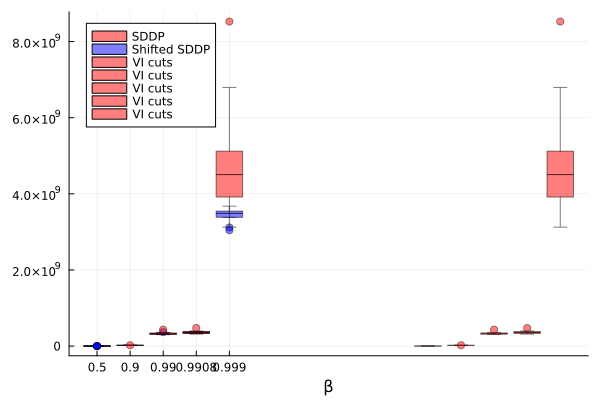

In [67]:
# # Assuming active_cuts_RVI and active_cuts_VI are lists of vectors of cut values
# # and beta_values is a list of Beta values

# Create the boxplots for active_cuts_RVI (blue) and active_cuts_VI (red)
boxplot([1], scores_VI[1], label="SDDP", color=:red, boxwidth=0.5, alpha=0.5)
boxplot!([1], scores_RVI[1], label=nothing, color=:blue, boxwidth=0.5, alpha=1.0)
boxplot!([2], scores_RVI[2], label="Shifted SDDP", color=:blue, boxwidth=0.5, alpha=0.5)
boxplot!([3], scores_RVI[3], label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)
boxplot!([4], scores_RVI[4], label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)
boxplot!([5], scores_RVI[5], label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)



boxplot!([2], scores_VI[2], label=nothing, color=:red, boxwidth=0.5, alpha=0.5)
boxplot!([3], scores_VI[3], label=nothing, color=:red, boxwidth=0.5, alpha=0.5)
boxplot!([4], scores_VI[4], label=nothing, color=:red, boxwidth=0.5, alpha=0.5)
boxplot!([5], scores_VI[5], label=nothing, color=:red, boxwidth=0.5, alpha=0.5)


boxplot!(1:length(beta_values), scores_VI, label="VI cuts", color=:red, boxwidth=0.3, alpha=0.5)

# # Set the x-ticks to show the Beta values
xticks!(1:length(beta_values), string.(beta_values))

# # Add labels and title
xlabel!("β")
# ylabel!("Number of active cuts out of 4872")
# title!("Active cuts: SDDP and shifted SDDP with varying β")
# savefig("TF_activecuts_out_of_4872")

In [82]:
beta_values

5-element Vector{Float64}:
 0.5
 0.9
 0.99
 0.9906
 0.999

In [83]:
to_plot_RVI = [
    [scores_RVI[i][j] * (1 - beta_values[i]) for j in 1:length(scores_RVI[i])] 
    for i in 1:length(scores_RVI)
]

to_plot_VI = [
    [scores_VI[i][j] * (1 - beta_values[i]) for j in 1:length(scores_VI[i])] 
    for i in 1:length(scores_VI)
]

# Print the result
println(to_plot_RVI)
println(to_plot_VI)

[[315150.8474805275, 315548.2185717665, 315525.3905615065, 315749.6315010104, 314373.04995512293, 315230.5847808778, 315145.7848364815, 315485.2832746522, 314985.88589473604, 316153.6487845244], [2.0721146533166918e6, 2.0970565156866456e6, 2.0877092105795546e6, 2.0723765417171556e6, 2.1183540009165076e6, 2.102194436725684e6, 2.140997571434161e6, 2.1223313121717665e6, 2.0719231085094875e6, 2.084954075474073e6], [3.1132976377846845e6, 3.213114719514664e6, 2.982620853948839e6, 3.362006507667278e6, 3.1905040208770866e6, 3.663305854602787e6, 3.496838454377957e6, 3.059196939008192e6, 3.166730161387106e6, 3.136337838055089e6], [3.3401399663208937e6, 3.2570928044231194e6, 3.0747098233295465e6, 3.608667490267989e6, 3.5773171725269035e6, 3.1019612575093503e6, 3.5794875917527024e6, 3.172762278140976e6, 3.1438662773887655e6, 3.435571077844485e6], [3.3869848808217547e6, 3.1164287550546275e6, 3.525433443125235e6, 3.6751912114033774e6, 3.4519802376247547e6, 3.381329309652214e6, 3.5211283645508895e6, 

In [97]:
plot()
boxplot!([1], to_plot_VI[1], label="Infinite-SDDP", color=:red, boxwidth=0.3, alpha=0.5)
boxplot!([1], to_plot_RVI[1], label="Infinite-RSDDP", color=:blue, boxwidth=0.5, alpha=0.5)
boxplot!([2], to_plot_VI[2],label=nothing, color=:red, boxwidth=0.3, alpha=0.5)
boxplot!([2], to_plot_RVI[2], label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)
boxplot!([3], to_plot_VI[3],label=nothing, color=:red, boxwidth=0.3, alpha=0.5)
boxplot!([3], to_plot_RVI[3], label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)
boxplot!([4], to_plot_VI[4],label=nothing, color=:red, boxwidth=0.3, alpha=0.5)
boxplot!([4], to_plot_RVI[4], label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)
boxplot!([5], to_plot_VI[5],label=nothing, color=:red, boxwidth=0.3, alpha=0.5)
boxplot!([5], to_plot_RVI[5], label=nothing, color=:blue, boxwidth=0.5, alpha=0.5)

xticks!(1:length(beta_values), string.(beta_values))
# yaxis!(log10)
xlabel!("β")
ylabel!("Simulated scores")
# title!("Active cuts: SDDP and shifted SDDP with varying β")
savefig("Scores_comparision_varying_beta")

"c:\\Users\\franc\\OneDrive\\Bureau\\Cours rangés\\MPRO\\Stage_Rio\\Julia_example\\code_propre\\Scores_comparision_varying_beta.png"